In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import ppscore as pps
%matplotlib inline

os.chdir('/Users/bmr225/Documents/DS_projects')

In [69]:
# To hide all the warnings in Python
import warnings
warnings.filterwarnings('ignore')

## INTRODUCTION
Over 370000 used cars scraped with Scrapy from Ebay-Kleinanzeigen. The content of the data is in German. The autos dataset download from Kaggle. Link: https://www.kaggle.com/orgesleka/used-cars-database/kernels

The investigation of this dataset can be broken in 3 main parts:


### Business Problems

#### Part I (Quantitative Analysis of the used car markets in Germany)
The aim of such analysis is to understand the car markets in Germany in terms of the cars popularity, average price,
average length of use.

#### Part II (Predictive Modeling of used car prices/ Used cars prices benchmarking)
The aim of this part is to predict the price of the used cars based on their criteria

#### Part III (Clustering/Segmentation Analysis)
The aim of such non supervised analysis of the used cars data is to understand which cars hold their value longer and which cars depreciate faster.


## I. Dataset Overview

In [70]:
# Load the data
autos = pd.read_csv('/Users/bmr225/Documents/PythonCodes/TDS_tutorials/autos.csv', encoding = 'Latin-1')
# Check the first 5 observations from the data
autos.head(5)

dateCrawled                                               name  \
0  2016-03-26 17:47:46                   Peugeot_807_160_NAVTECH_ON_BOARD   
1  2016-04-04 13:38:56         BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik   
2  2016-03-26 18:57:24                         Volkswagen_Golf_1.6_United   
3  2016-03-12 16:58:10  Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...   
4  2016-04-01 14:38:50  Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...   

   seller offerType   price   abtest vehicleType  yearOfRegistration  \
0  privat   Angebot  $5,000  control         bus                2004   
1  privat   Angebot  $8,500  control   limousine                1997   
2  privat   Angebot  $8,990     test   limousine                2009   
3  privat   Angebot  $4,350  control  kleinwagen                2007   
4  privat   Angebot  $1,350     test       kombi                2003   

     gearbox  powerPS   model   odometer  monthOfRegistration fuelType  \
0    manuell      158  andere  150,000km                    3      lpg   
1  automatik      286     7er  150,000km                    6   benzin   
2    manuell      102    golf   70,000km                    7   benzin   
3  automatik       71  fortwo   70,000km                    6   benzin   
4    manuell        0   focus  150,000km                    7   benzin   

        brand notRepairedDamage          dateCreated  nrOfPictures  \
0     peugeot              nein  2016-03-26 00:00:00             0   
1         bmw              nein  2016-04-04 00:00:00             0   
2  volkswagen              nein  2016-03-26 00:00:00             0   
3       smart              nein  2016-03-12 00:00:00             0   
4        ford              nein  2016-04-01 00:00:00             0   

   postalCode             lastSeen  
0       79588  2016-04-06 06:45:54  
1       71034  2016-04-06 14:45:08  
2       35394  2016-04-06 20:15:37  
3       33729  2016-03-15 03:16:28  
4       39218  2016-04-01 14:38:50

In [71]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

### A quick inspection of the columns of the dataset reveals the following:
- Date Crawled and Date lastSeen are to be removed as they are not related to the prediction of price 
- Month of registration also is data that has little to do with the price of the used car
- nrOfPictures also is to be removed as it has little to do with the prediction of price
- Name of the car should be removed as well as this information is conveyed through Brand and Model
- Postal Code to be converted to a categorical value
- 'Age of the car' can be extracted from year of registration an datecreated as the Year as numerical variable can be misleading to be used as it is in a prediction problem and further transformation needs to be performed
- Columns like Price and Odometer should be numerical and not object.. They need to be cleaned of the string features
- Date columns such as 'dateCreated' needs to be converted to datetime columns and checked for outliers erroneous values before computation of 'Age of the car'.
- Name of the variables/columns can be adjusted, such as notRepairedDamage which can be replaced by unrepaired_damage
- Translation of the categories names from German to English will make the data more friendly for English speakers. 
- After cleaning the data and adjusting the types of the columns
  * Categorical columns: name, seller, offerType, abteset, vehicleType,gearbox,model,fuelType,brain, notRepairedDamage,                        postalCode(numerical to be converted)  
  * Numerical columns: price, yearOfRegistration,powerPS, monthOfRegistration, nrOfPictures
  * Datetime columns: dateCrawled, dateCreated, lastSeen

## II. Data Cleaning

### A. Extraction of 'Age of the Car' from 'yearOfRegistration' and 'Year_created': Feature Engineering I
Before computing age of the car, a careful inspection of dateCreated and yearOfRegistration is required. Therefore, converting 

(array([16587., 16617., 16648., 16679., 16709., 16740., 16770., 16801.,
        16832., 16861., 16892.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

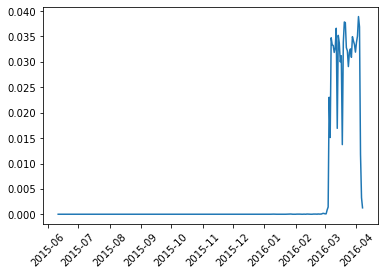

In [72]:
# Datetime format
import time
cols = ['dateCreated']
for col in cols:
    autos[col]= autos[col].apply(lambda x: x[:10])# removing the time.. 
    autos[col]= pd.to_datetime(autos[col])

    # Visualization
date_s = autos['dateCreated'].value_counts(normalize=True, dropna = False).sort_index()
plt.plot((date_s.index),date_s.to_list())
plt.xticks(rotation=45)

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

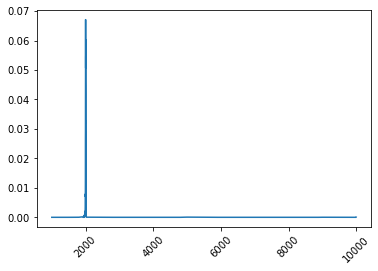

In [73]:
# Registration Year: int64
date_s = autos['yearOfRegistration'].value_counts(normalize=True, dropna = False).sort_index()
plt.plot((date_s.index),date_s.to_list())
plt.xticks(rotation=45)

Based on the plot above, it seems that there are erroneous values in 'yearOfRegistration' that we would need to clean.
- No value should be > 2016 as it is the year the ads were scraped.
- Elimination of very old cars <1980 as too old car values will be values as an antique and won't follow the current model

(47492, 20)

(1970.0, 2020.0)

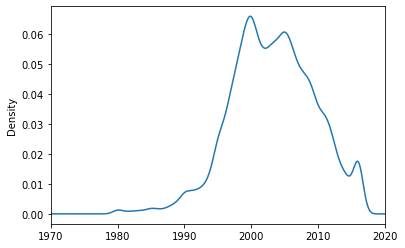

In [74]:
autos_df = autos[autos['yearOfRegistration'].between(1980,2016)]
display(autos_df.shape)
# from (1980 to 2016) around 47492 entries left
autos_df['yearOfRegistration'].plot.kde()
plt.xlim([1970,2020])

###  Extracting Age of the car feature

In [75]:
# First, computing 'Age Car'rounded by years
autos_df['Year_created'] = pd.DatetimeIndex(autos_df['dateCreated']).year
autos_df['Age_Car'] = autos_df['Year_created']- autos_df['yearOfRegistration']

### B. Dropping of Irrelevant Columns

In [76]:
# Removing the six columns mentioned above
autos_df.drop(['name','dateCrawled','lastSeen','nrOfPictures','monthOfRegistration','Year_created','yearOfRegistration','dateCreated'],axis=1,inplace = True)

### C. Fixing names of the columns

In [77]:
# Replaces all spaces with underscores
autos_df.rename(columns={'notRepairedDamage':'unrepaired_damage',                                    
                      'vehicleType':'vehicle_type',
                      'offerType': 'offer_type',
                      'fuelType': 'fuel_type',
                      'postalCode': 'postal_code'}, inplace=True)

### D.  Translation of categories of the categorical columns from German to English

In [78]:
cat_cols = ['abtest','vehicle_type','seller','gearbox','unrepaired_damage','offer_type']

for col in cat_cols:    
    display(autos_df[col].unique())

array(['control', 'test'], dtype=object)

array(['bus', 'limousine', 'kleinwagen', 'kombi', nan, 'coupe', 'suv',
       'cabrio', 'andere'], dtype=object)

array(['privat', 'gewerblich'], dtype=object)

array(['manuell', 'automatik', nan], dtype=object)

array(['nein', nan, 'ja'], dtype=object)

array(['Angebot', 'Gesuch'], dtype=object)

In [79]:
# Translation of the categories names from German to English
# Translation
autos_df['seller'] = autos_df['seller'].str.replace('privat','private').replace('gewerblich','commercial')
autos_df['vehicle_type'] = autos_df['vehicle_type'].str.replace('Kombi','combi').replace('kleinwagen','small car').replace('cabrio','convertible').replace('andere','Other')
autos_df['gearbox'] =autos_df['gearbox'].str.replace('manuell','manual').replace('automatik','automatic')
autos_df['unrepaired_damage']= autos_df['unrepaired_damage'].str.replace('nein','no').replace('ja', 'yes')
autos_df['offer_type']= autos_df['offer_type'].str.replace('Angebot','offer').replace('Gesuch', 'searched')
autos_df['fuel_type']= autos_df['fuel_type'].str.replace('benzin','gasoline').replace('elektro','electric').replace('andere','other')

In [80]:
autos_df.head()

seller offer_type   price   abtest vehicle_type    gearbox  powerPS  \
0  private      offer  $5,000  control          bus     manual      158   
1  private      offer  $8,500  control    limousine  automatic      286   
2  private      offer  $8,990     test    limousine     manual      102   
3  private      offer  $4,350  control    small car  automatic       71   
4  private      offer  $1,350     test        kombi     manual        0   

    model   odometer fuel_type       brand unrepaired_damage  postal_code  \
0  andere  150,000km       lpg     peugeot                no        79588   
1     7er  150,000km  gasoline         bmw                no        71034   
2    golf   70,000km  gasoline  volkswagen                no        35394   
3  fortwo   70,000km  gasoline       smart                no        33729   
4   focus  150,000km  gasoline        ford                no        39218   

   Age_Car  
0       12  
1       19  
2        7  
3        9  
4       13

### E. Cleaning numerical columns and converting them to either float or int

In [81]:
# Removing the $ from the price string and converting it to float
autos_df["price"] = autos_df["price"].str.replace('$','').str.replace(',','').astype(float)
autos_df.rename({'price':'price_dollars'}, axis =1, inplace = True)

# Removing the km from the odometer string and converting it to float
autos_df["odometer"] = autos["odometer"].str.replace('km','').str.replace(',','').astype(float)
autos_df.rename({'odometer':'odometer_km'}, axis =1, inplace = True)

### F. Conversion of type of 'postal_code' from numerical to categorical

In [82]:
# Postal code, refering to the location is considered categorical variable
col = 'postal_code'
autos_df[col] = autos_df[col].astype('category')

### G. Removal of data duplicates

In [83]:
# Step I: 
# Drop complete duplicates from autos_df
autos_df_dup = autos_df.drop_duplicates()
autos_df_dup.head()

seller offer_type  price_dollars   abtest vehicle_type    gearbox  \
0  private      offer         5000.0  control          bus     manual   
1  private      offer         8500.0  control    limousine  automatic   
2  private      offer         8990.0     test    limousine     manual   
3  private      offer         4350.0  control    small car  automatic   
4  private      offer         1350.0     test        kombi     manual   

   powerPS   model  odometer_km fuel_type       brand unrepaired_damage  \
0      158  andere     150000.0       lpg     peugeot                no   
1      286     7er     150000.0  gasoline         bmw                no   
2      102    golf      70000.0  gasoline  volkswagen                no   
3       71  fortwo      70000.0  gasoline       smart                no   
4        0   focus     150000.0  gasoline        ford                no   

  postal_code  Age_Car  
0       79588       12  
1       71034       19  
2       35394        7  
3       33729        9  
4       39218       13

In [84]:
autos_df_dup.shape # size of dataframe after dropping complete duplicate entries

(47173, 14)

In [85]:
# Now checking for incomplete duplicates, in other words entries that match in all of the variables except for the price
# This usually indicates that there might've been a price change listed as a new entry 
col_names =['abtest','gearbox','vehicle_type','model','fuel_type','brand','postal_code','odometer_km','powerPS','Age_Car','unrepaired_damage']
duplicates = autos_df_dup.duplicated(subset = col_names , keep = False)

autos_with_dup = autos_df_dup[duplicates].sort_values(by=['postal_code','model']).reset_index()
autos_not_dup = autos_df_dup[~duplicates]
autos_not_dup.shape

(46651, 14)

In [86]:
# Inspecting the duplicates where only 'price_dollars' change confirm our prior guess: multiple listings due to price chaange
# Groupby method and aggregation here wont' work
autos_with_dup[:4]

index   seller offer_type  price_dollars   abtest vehicle_type gearbox  \
0   9066  private      offer         2600.0     test    limousine  manual   
1  31956  private      offer         2900.0     test    limousine  manual   
2  28234  private      offer          600.0  control    small car  manual   
3  39354  private      offer            1.0  control    small car  manual   

   powerPS  model  odometer_km fuel_type       brand unrepaired_damage  \
0        0   golf     150000.0    diesel  volkswagen               NaN   
1        0   golf     150000.0    diesel  volkswagen               NaN   
2      115  focus     150000.0  gasoline        ford               NaN   
3      115  focus     150000.0  gasoline        ford               NaN   

  postal_code  Age_Car  
0        4177       11  
1        4177       11  
2        4603       17  
3        4603       17

In [87]:
# The size of duplicates entries because of price change, including the original listing.
autos_with_dup.shape

(522, 15)

<AxesSubplot:xlabel='price_dollars', ylabel='Density'>

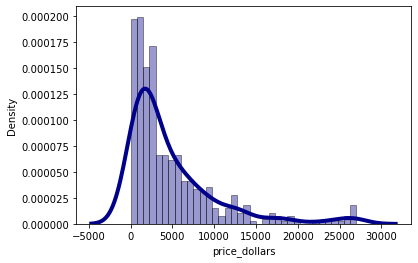

In [88]:
# Density plot and Histogram of price
sns.distplot(autos_with_dup['price_dollars'],hist=True, kde=True, 
            bins=int(180/5), color='darkblue',
            hist_kws={'edgecolor':'black'},
            kde_kws={'linewidth':4}
            )

#### Suggested solution
To aggregate the repeat of prices and choose the max (to avoid the erroneous entries of 0).
#### Problem
The lack of unique identifiers, the neat solution of groupby identifier and use max as an aggregate function 
wont work in this case.. 
######################

#### A way around
To make another copy of the duplicated listing, but removing the 'price_dollars' (the only thing that changes between 
repeated listings). This is way, we can use drop_duplicates function again to drop complete duplicates.

Additional manipulation is performed to recover the max prices of the repeated listings as shown below.

In [89]:
# To make a copy of the dataframe of duplicated listings(with original)
autos_with_dup_cp = autos_with_dup.drop(['index','price_dollars'],axis=1)
autos_with_dup_cp_dup = autos_with_dup_cp.drop_duplicates()
autos_with_dup_cp_dup.shape

(257, 13)

In [90]:
# Inspecting the dataframe after removal of duplicate entries
autos_with_dup_cp_dup.head()

seller offer_type   abtest vehicle_type gearbox  powerPS    model  \
0  private      offer     test    limousine  manual        0     golf   
2  private      offer  control    small car  manual      115    focus   
4  private      offer     test    small car  manual       60  1_reihe   
6  private      offer  control    small car  manual       68  2_reihe   
8  private      offer     test  convertible     NaN        0      3er   

   odometer_km fuel_type       brand unrepaired_damage postal_code  Age_Car  
0     150000.0    diesel  volkswagen               NaN        4177       11  
2     150000.0  gasoline        ford               NaN        4603       17  
4     150000.0  gasoline     peugeot               NaN        4736       19  
6      90000.0    diesel     peugeot                no        6126        4  
8     150000.0       NaN         bmw               NaN        6193       20

In [91]:
# The code to compute the max price of repeated listings involve using the indices the dataframe after dropping the
# complete duplicates
ind_l = autos_with_dup_cp_dup.index.to_list()
ind_l[:4]

[0, 2, 4, 6]

In [92]:
# Computing the difference between consecutive items in l_
increment_l =  [j - i for i, j in zip(ind_l[: -1], ind_l[1 :])] 
increment_l.append(autos_with_dup.shape[0] - ind_l[-1])

# Finding the max of prices by using the indices: to position to different listing, the increment to aggregate the repeated listings
price_l =[]
i=0

for ind in ind_l:
    price_l.append(np.max([autos_with_dup.loc[ind:(ind + increment_l[i]-1),'price_dollars']]))
    i+=1   
# Adding a price_column to autos_with_dup_cp_dup
autos_with_dup_cp_dup['price_dollars'] = price_l

# Inspecting the dataframe: looks good
autos_with_dup_cp_dup.head()

seller offer_type   abtest vehicle_type gearbox  powerPS    model  \
0  private      offer     test    limousine  manual        0     golf   
2  private      offer  control    small car  manual      115    focus   
4  private      offer     test    small car  manual       60  1_reihe   
6  private      offer  control    small car  manual       68  2_reihe   
8  private      offer     test  convertible     NaN        0      3er   

   odometer_km fuel_type       brand unrepaired_damage postal_code  Age_Car  \
0     150000.0    diesel  volkswagen               NaN        4177       11   
2     150000.0  gasoline        ford               NaN        4603       17   
4     150000.0  gasoline     peugeot               NaN        4736       19   
6      90000.0    diesel     peugeot                no        6126        4   
8     150000.0       NaN         bmw               NaN        6193       20   

   price_dollars  
0         2900.0  
2          600.0  
4          599.0  
6         5999.0  
8         1600.0

In [93]:
#To concatenate the 2 data frame, autos_not_dup (no duplicates),autos_with_dup_cp_dup (just cleaned)
autos_df = autos_not_dup.append(autos_with_dup_cp_dup)
autos_df.head()

seller offer_type  price_dollars   abtest vehicle_type    gearbox  \
0  private      offer         5000.0  control          bus     manual   
1  private      offer         8500.0  control    limousine  automatic   
2  private      offer         8990.0     test    limousine     manual   
3  private      offer         4350.0  control    small car  automatic   
4  private      offer         1350.0     test        kombi     manual   

   powerPS   model  odometer_km fuel_type       brand unrepaired_damage  \
0      158  andere     150000.0       lpg     peugeot                no   
1      286     7er     150000.0  gasoline         bmw                no   
2      102    golf      70000.0  gasoline  volkswagen                no   
3       71  fortwo      70000.0  gasoline       smart                no   
4        0   focus     150000.0  gasoline        ford                no   

  postal_code  Age_Car  
0       79588       12  
1       71034       19  
2       35394        7  
3       33729        9  
4       39218       13

In [94]:
## DataFrame with no duplicates
autos_df.shape

(46908, 14)

In [95]:
autos_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46908 entries, 0 to 520
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   seller             46908 non-null  object  
 1   offer_type         46908 non-null  object  
 2   price_dollars      46908 non-null  float64 
 3   abtest             46908 non-null  object  
 4   vehicle_type       43859 non-null  object  
 5   gearbox            44606 non-null  object  
 6   powerPS            46908 non-null  int64   
 7   model              44581 non-null  object  
 8   odometer_km        46908 non-null  float64 
 9   fuel_type          43303 non-null  object  
 10  brand              46908 non-null  object  
 11  unrepaired_damage  38191 non-null  object  
 12  postal_code        46908 non-null  category
 13  Age_Car            46908 non-null  int64   
dtypes: category(1), float64(2), int64(2), object(9)
memory usage: 5.5+ MB


### G. Definition of Categorical and Numerical Columns

In [96]:
column_datatypes = autos_df.dtypes
categorical_columns = list(column_datatypes[column_datatypes=="object"].index.values)
numerical_columns = list(column_datatypes[((column_datatypes=="float64")|(column_datatypes=="int64"))].index.values)
print('The categorical columns in the dataset are: {}'.format(categorical_columns))
print('The numerical columns in the dataset are: {}'.format(numerical_columns))

The categorical columns in the dataset are: ['seller', 'offer_type', 'abtest', 'vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'unrepaired_damage']
The numerical columns in the dataset are: ['price_dollars', 'powerPS', 'odometer_km', 'Age_Car']


### H. Missing Values

<AxesSubplot:>

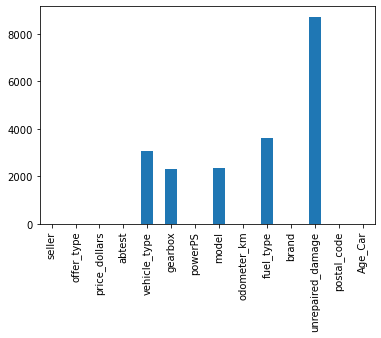

In [97]:
# Visualizing missing values
autos_df.isnull().sum().plot(kind = 'bar')

In [98]:
autos_cols = autos_df.columns

null_cols = list(autos_cols[autos_df.isnull().any()])
null_cols

['vehicle_type', 'gearbox', 'model', 'fuel_type', 'unrepaired_damage']

In [99]:
threshold = 0.2 # 20 percent

def drop_na_cols(df,threshold):
    thresh_na_len = len(df) * threshold
    df.dropna(thresh = threshold, axis = 1, inplace = True)
    
    return df
    

In [100]:
drop_na_cols(autos_df,threshold)

seller offer_type  price_dollars   abtest vehicle_type    gearbox  \
0    private      offer         5000.0  control          bus     manual   
1    private      offer         8500.0  control    limousine  automatic   
2    private      offer         8990.0     test    limousine     manual   
3    private      offer         4350.0  control    small car  automatic   
4    private      offer         1350.0     test        kombi     manual   
..       ...        ...            ...      ...          ...        ...   
512  private      offer        13500.0  control          suv  automatic   
514  private      offer         6995.0  control          NaN  automatic   
516  private      offer         2199.0     test    limousine     manual   
518  private      offer         2222.0  control    small car     manual   
520  private      offer         1399.0     test    small car     manual   

     powerPS    model  odometer_km fuel_type           brand  \
0        158   andere     150000.0       lpg         peugeot   
1        286      7er     150000.0  gasoline             bmw   
2        102     golf      70000.0  gasoline      volkswagen   
3         71   fortwo      70000.0  gasoline           smart   
4          0    focus     150000.0  gasoline            ford   
..       ...      ...          ...       ...             ...   
512      218  x_reihe     150000.0    diesel             bmw   
514      125      NaN     150000.0       NaN  sonstige_autos   
516      114  primera     150000.0  gasoline          nissan   
518       75    corsa     150000.0  gasoline            opel   
520       68    yaris     150000.0  gasoline          toyota   

    unrepaired_damage postal_code  Age_Car  
0                  no       79588       12  
1                  no       71034       19  
2                  no       35394        7  
3                  no       33729        9  
4                  no       39218       13  
..                ...         ...      ...  
512                no       94327       10  
514                no       94374       31  
516               yes       95447       16  
518                no       97616       13  
520                no       97631       15  

[46908 rows x 14 columns]

No columns got dropped, which means that all of the columns have Null values less than 20% of the length of the columns

#### EDA of categorical columns 
Necessary to help make a decision of the missing values handling

In [101]:
def categorical_eda(cols,df):
    """Given cols, generate EDA of categorical data"""
    #print("To check: Unique count of non-numeric data")
    #print(df.select_dtypes(include=['category']).nunique())
 
    # Plot count distribution of categorical data
    for col in cols:
        fig = sns.catplot(x=col, kind="count", data=df)
        fig.set_xticklabels(rotation=45)
        plt.show()

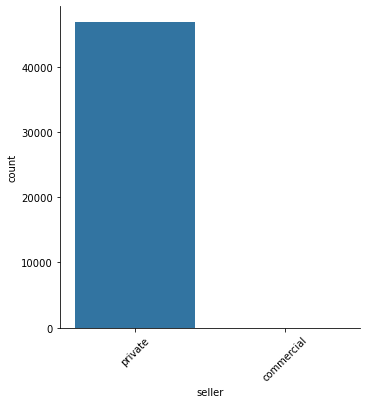

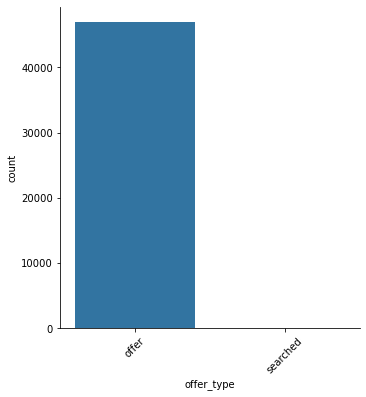

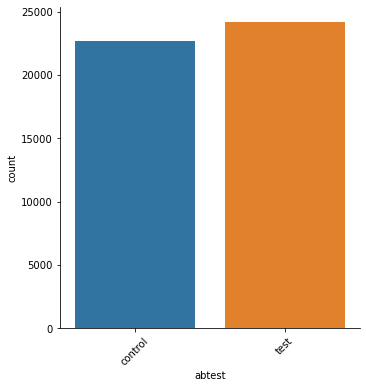

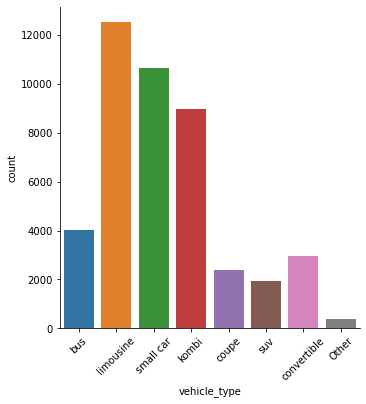

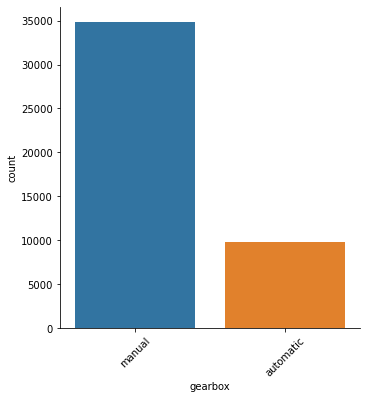

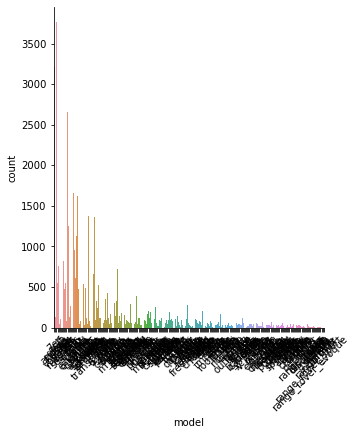

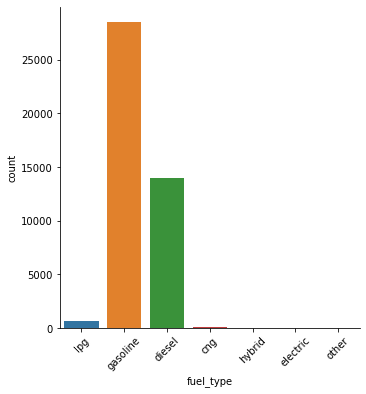

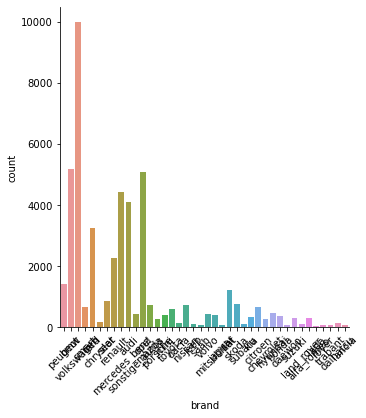

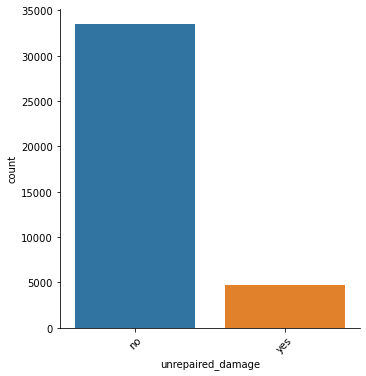

In [102]:
categorical_eda(categorical_columns, autos_df)

In [103]:
autos_df['unrepaired_damage'].value_counts()

no     33474
yes     4717
Name: unrepaired_damage, dtype: int64

In [104]:
autos_df['fuel_type'].value_counts()

gasoline    28508
diesel      13995
lpg           656
cng            71
hybrid         37
electric       19
other          17
Name: fuel_type, dtype: int64

#### Decisions and Rationale
All the missing values are in the categorical columns, with 'unrepaired_damage' column having only 81.4% of its values non-null. 

###### I.  'unrepaired_damage', decision is to use SimpleImputer using the strategy of 'most frequent'
My rationale behind such decision is the assumption that most probably if there is a significant unrepaired damage that will change dramatically the price of the car from the used car benchmarking price, it's gonna be repaired  as yes.. otherwise, the nonreported cases (Null) might have just ignored the entry or refrained to report a small damage to the car such as dent... Therefore, an approximation by using the most frequent category: No.

##### II. 'fuel_type' and 'gearbox', decision is to use SimpleImputer using the strategy of 'most frequent'
There is a strong predominance of gasoline as the fuel_type over diesel, with other types of fuel being rare. In this instance, replacing the null values with gasoline seems like a good decision as it won't change much the predominance of gasoline cars in the used car German market.Same applies for 'gearbox' as there is a strong predominane of 'manual cars'.


#### For 'model' and 'vehicle_type'
The decision is to drop the rows with empty entries as 'model' and 'vehicle_type' seem to be: a. a lot more variable with no clear predominance of a particular category.
b. Based on later analyses, these columns are features more strongly related to the 'price'. Therefore, noise introduced by improper imputing techniques might compromise the model performance.

In [105]:
from sklearn.impute import SimpleImputer


def impute_cols(df, nan_cols):
    
    cols = list(df.columns)
    nan_cols_inds = [cols.index(col) for col in nan_cols if df[col].isnull().any()]
    
    df_array = df.iloc[:,:].values
    


    for ind in nan_cols_inds:
        if df.iloc[:,ind].dtype =='O': # categorical column
           imputer = SimpleImputer(missing_values = np.nan ,strategy='most_frequent')
        elif ((df.iloc[:,ind].dtype =='float64')| (df.iloc[:,ind].dtype =='int64')): # Numerical column
            imputer = SimpleImputer(missing_values = np.nan ,strategy='median')
           
        df_array[:,ind] = imputer.fit_transform(df_array[:,ind].reshape(-1,1)).flatten()
               
    return df_array # numpy array

In [106]:
# Impute the missing values in the categorical columns
df_impute = impute_cols(autos_df,['unrepaired_damage','fuel_type','gearbox'])

In [107]:
# To recover the dataframe from the numpy array
autos_df = pd.DataFrame(df_impute, columns = autos_df.columns)
autos_df['price_dollars'] = autos_df['price_dollars'].astype('float64')
autos_df['powerPS'] = autos_df['powerPS'].astype('int64')
autos_df['odometer_km'] = autos_df['odometer_km'].astype('float64')
autos_df['Age_Car'] = autos_df['Age_Car'].astype('float64')

In [108]:
autos_df.head()

seller offer_type  price_dollars   abtest vehicle_type    gearbox  \
0  private      offer         5000.0  control          bus     manual   
1  private      offer         8500.0  control    limousine  automatic   
2  private      offer         8990.0     test    limousine     manual   
3  private      offer         4350.0  control    small car  automatic   
4  private      offer         1350.0     test        kombi     manual   

   powerPS   model  odometer_km fuel_type       brand unrepaired_damage  \
0      158  andere     150000.0       lpg     peugeot                no   
1      286     7er     150000.0  gasoline         bmw                no   
2      102    golf      70000.0  gasoline  volkswagen                no   
3       71  fortwo      70000.0  gasoline       smart                no   
4        0   focus     150000.0  gasoline        ford                no   

  postal_code  Age_Car  
0       79588     12.0  
1       71034     19.0  
2       35394      7.0  
3       33729      9.0  
4       39218     13.0

<AxesSubplot:>

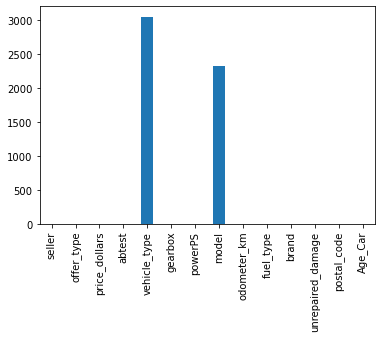

In [109]:
autos_df.isnull().sum().plot(kind = 'bar')

In [110]:
# Dropping the Na rows
autos_df.dropna(inplace = True)
autos_df.shape

(42118, 14)

In [111]:
autos_df.describe(include='object')

seller offer_type abtest vehicle_type gearbox  model fuel_type  \
count     42118      42118  42118        42118   42118  42118     42118   
unique        2          2      2            8       2    243         7   
top     private      offer   test    limousine  manual   golf  gasoline   
freq      42117      42117  21723        12069   33026   3441     28061   

             brand unrepaired_damage  postal_code  
count        42118             42118        42118  
unique          39                 2         6823  
top     volkswagen                no        65428  
freq          8896             37999           86

##### Descriptive Statistics of Numerical Columns

In [112]:
autos_df.describe(include='number')

price_dollars       powerPS    odometer_km       Age_Car
count   4.211800e+04  42118.000000   42118.000000  42118.000000
mean    9.426492e+03    121.348402  126081.960207     12.936963
std     5.087969e+05    179.363751   38975.682262      5.847509
min     0.000000e+00      0.000000    5000.000000      0.000000
25%     1.299000e+03     75.000000  125000.000000      9.000000
50%     3.215500e+03    110.000000  150000.000000     13.000000
75%     7.700000e+03    150.000000  150000.000000     17.000000
max     1.000000e+08  17700.000000  150000.000000     36.000000

### H. Outlier Detection & Handling

In [113]:
def find_IQR(col):
    
    lower_bound = np.percentile(col,25,axis = 0)
    upper_bound = np.percentile(col,75, axis = 0)
      
    return lower_bound, upper_bound, (upper_bound - lower_bound)

def outliers_clean(df,col):
    
    Q1, Q3, iqr = find_IQR(df[col])
    
    if sum(list(df[col]< Q1 - 1.5*Q1)): 
       df.loc[(df[col] < Q1 - 1.5*Q1), col]= Q1 - 1.5*Q1
    
    if sum(list(df[col] > Q3 + 1.5*Q3)): 
         df.loc[(df[col] > Q3 + 1.5*Q3), col]= Q3 +  1.5*Q3 
            
    return df

Before blindly applying outliers clean, it is crucial to get a good sense of the range of the values in the numerical 
columns and what constitute an outier or potentially an erroneous value.

#### Investigating data range of the numerical features
'powerPS', 'odometer_km', 'Age_Car', 'price_dollars'

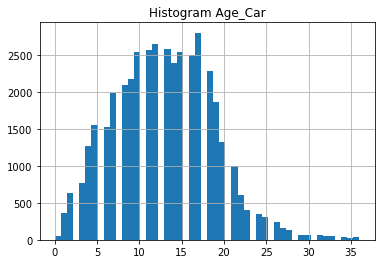

In [114]:
# Age_Car
autos_df['Age_Car'].hist(bins=50)
plt.title('Histogram Age_Car')
plt.show()

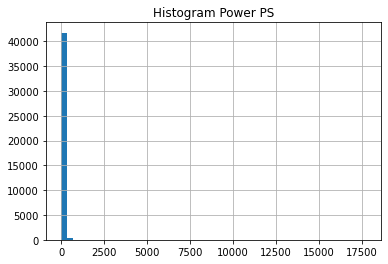

In [115]:
# powerPS
autos_df['powerPS'].hist(bins=50)
plt.title('Histogram Power PS')
plt.show()

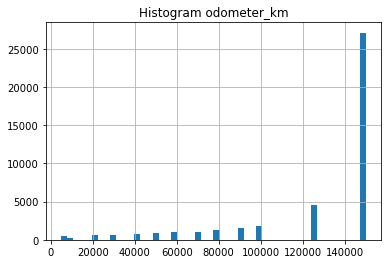

In [116]:
# odometer_km
autos_df['odometer_km'].hist(bins=50)
plt.title('Histogram odometer_km')
plt.show()

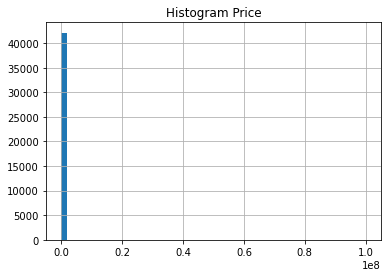

In [117]:
# price_dollars
autos_df['price_dollars'].hist(bins=50)
plt.title('Histogram Price')
plt.show()

##### The case of 0 entries
In the absence of null entries in the numerical columns, and the presence of 0 entries in powerPS and price_dollars might represent missing values particularly in powerPS (either unknown by the seller or not entered) and price_dollars (either error in data entry or not entered by the seller. 0 entries in Age_Car will be not changed as it means the car is less than 1 year old. The range of values for Odometer_km is ok and nothing would be changed.

In [118]:
Q1, Q3, iqr = find_IQR(autos_df['powerPS'])
print (Q1)
print (Q3)
print (Q1-1.5*iqr)
print (Q3+1.5*iqr) 

75.0
150.0
-37.5
262.5


In [119]:
autos_df[autos_df['powerPS'] == 0]

seller offer_type  price_dollars   abtest vehicle_type gearbox  \
4      private      offer         1350.0     test        kombi  manual   
31     private      offer          350.0  control    small car  manual   
34     private      offer         1200.0     test        kombi  manual   
51     private      offer         3500.0     test    limousine  manual   
70     private      offer         1500.0  control        kombi  manual   
...        ...        ...            ...      ...          ...     ...   
46814  private      offer         2900.0  control          bus  manual   
46815  private      offer         2750.0     test        kombi  manual   
46843  private      offer         4100.0  control    small car  manual   
46844  private      offer         3200.0     test    small car  manual   
46849  private      offer         1900.0  control    limousine  manual   

       powerPS   model  odometer_km fuel_type       brand unrepaired_damage  \
4            0   focus     150000.0  gasoline        ford                no   
31           0   corsa     150000.0  gasoline        opel                no   
34           0  mondeo     150000.0  gasoline        ford                no   
51           0  andere       5000.0  gasoline        opel                no   
70           0   astra     150000.0  gasoline        opel                no   
...        ...     ...          ...       ...         ...               ...   
46814        0  touran     150000.0    diesel  volkswagen                no   
46815        0  touran     150000.0    diesel  volkswagen                no   
46843        0      a3     150000.0    diesel        audi                no   
46844        0      a4     150000.0    diesel        audi                no   
46849        0  fiesta     150000.0  gasoline        ford                no   

      postal_code  Age_Car  
4           39218     13.0  
31          27619     17.0  
34          52428     18.0  
51          63500     31.0  
70          23627     10.0  
...           ...      ...  
46814       51065     12.0  
46815       51065     12.0  
46843       60314      9.0  
46844       60314     11.0  
46849       61169     13.0  

[3026 rows x 14 columns]

Obviously, there will be no entries < (Q1-1.5*iqr), as the values are >=0. Therefore, our Outlier function won't work and it's better to decide outliers value otherwise based on our understanding of the data.

Therefore, we are gonna impute the 0 entries in column 'powerPS', but converting them to Nan, then using impute function with median values.

In [120]:
autos_df['powerPS'] = autos_df['powerPS'].replace(0,np.nan)

<AxesSubplot:>

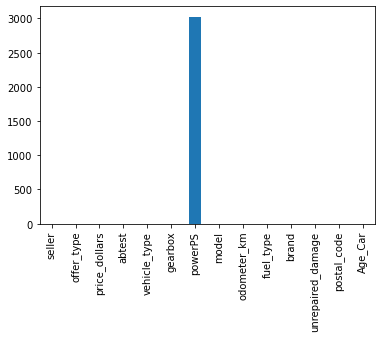

In [121]:
autos_df.isnull().sum().plot(kind = 'bar')

In [122]:
# Impute the missing values in powerPS
df_impute = impute_cols(autos_df,['powerPS'])
# To recover the dataframe from the numpy array
autos_df = pd.DataFrame(df_impute, columns = autos_df.columns)
autos_df['price_dollars'] = autos_df['price_dollars'].astype('float64')
autos_df['powerPS'] = autos_df['powerPS'].astype('int64')
autos_df['odometer_km'] = autos_df['odometer_km'].astype('float64')
autos_df['Age_Car'] = autos_df['Age_Car'].astype('float64')

##### Handling of extreme values (potentially erroneous)

In [123]:
# Handling of extreme values
#  1000 horsepower  or greater seem like a high value and therefore those entries seem erroneous
autos_df[(autos_df['powerPS'] > 1000)]

seller offer_type  price_dollars   abtest vehicle_type    gearbox  \
1431   private      offer         1200.0     test    limousine     manual   
2234   private      offer          360.0  control    small car     manual   
3135   private      offer         4700.0  control    small car     manual   
3687   private      offer         2200.0     test    limousine  automatic   
3739   private      offer         1650.0  control    small car  automatic   
4005   private      offer         2200.0  control        coupe     manual   
8379   private      offer         7200.0  control    small car     manual   
8970   private      offer          100.0  control    small car     manual   
9276   private      offer         2550.0  control    small car  automatic   
9527   private      offer         8600.0  control        Other  automatic   
11412  private      offer          750.0  control    small car     manual   
11692  private      offer         5500.0  control    limousine     manual   
12281  private      offer         1000.0     test    small car     manual   
15094  private      offer         5000.0  control        kombi     manual   
15146  private      offer         2798.0  control  convertible     manual   
16272  private      offer          399.0  control        Other     manual   
16529  private      offer         1600.0  control          bus     manual   
17167  private      offer         1199.0     test        kombi     manual   
18984  private      offer         5200.0     test    small car     manual   
19865  private      offer         9750.0     test        kombi  automatic   
20914  private      offer         1150.0  control          bus     manual   
21289  private      offer         3990.0  control        kombi     manual   
23143  private      offer         3200.0  control    small car     manual   
23838  private      offer          800.0     test        kombi     manual   
24761  private      offer         1450.0     test    limousine  automatic   
27923  private      offer         3500.0  control    limousine     manual   
29360  private      offer        11950.0     test  convertible     manual   
30504  private      offer         6000.0     test        kombi  automatic   
30977  private      offer         9500.0     test    limousine  automatic   
31548  private      offer          500.0  control        kombi     manual   
33511  private      offer         1500.0     test        kombi     manual   
33574  private      offer          600.0     test        kombi     manual   
34025  private      offer         9900.0     test          bus     manual   
34472  private      offer          950.0     test    small car     manual   
34892  private      offer         1900.0     test    small car     manual   
36743  private      offer         5400.0  control        kombi     manual   
38074  private      offer         2200.0  control    limousine  automatic   
41259  private      offer         1250.0  control        kombi  automatic   

       powerPS        model  odometer_km fuel_type          brand  \
1431      6512        corsa     150000.0  gasoline           opel   
2234      1988        focus     150000.0  gasoline           ford   
3135      6045         polo     125000.0  gasoline     volkswagen   
3687      1781         golf     150000.0  gasoline     volkswagen   
3739      1001     a_klasse     150000.0  gasoline  mercedes_benz   
4005      1793           tt     150000.0  gasoline           audi   
8379      1016        yaris      30000.0  gasoline         toyota   
8970      3750         polo     125000.0  gasoline     volkswagen   
9276      6226       fortwo     125000.0  gasoline          smart   
9527      3500  transporter     150000.0  gasoline     volkswagen   
11412     1400     a_klasse     150000.0  gasoline  mercedes_benz   
11692     1090        focus     150000.0  gasoline           ford   
12281     4400        ibiza      90000.0  gasoline           seat   
15094     1055        astra     125000

Very few rows have value for powerPS > 1000, therefore I decided to impute with median value.

In [124]:
autos_df.loc[autos_df.powerPS >1000,'powerPS']= autos_df.powerPS.median()

In [125]:
# Checking to make sure extreme values replaced with median()
autos_df[autos_df['powerPS']>1000]

Empty DataFrame
Columns: [seller, offer_type, price_dollars, abtest, vehicle_type, gearbox, powerPS, model, odometer_km, fuel_type, brand, unrepaired_damage, postal_code, Age_Car]
Index: []

##### Manual Inspection of the values in the target column: 'price_dollars'

In [126]:
# Inspection of the max entry in the column of ['price_dollars'] reveals an erroneous entry
autos_df[autos_df['price_dollars'] == np.max(autos_df['price_dollars'])]

seller offer_type  price_dollars   abtest vehicle_type    gearbox  \
33251  private      offer     99999999.0  control    limousine  automatic   

       powerPS     model  odometer_km fuel_type          brand  \
33251      224  s_klasse     150000.0  gasoline  mercedes_benz   

      unrepaired_damage postal_code  Age_Car  
33251                no       73525     17.0

### Decision about erroneous entries in the target column: To drop the entries

In [127]:
autos_df= autos_df[~(autos_df['price_dollars'] == np.max(autos_df['price_dollars']))]

In [128]:
autos_df['price_dollars'].describe() 

count    4.211700e+04
mean     7.052378e+03
std      1.465611e+05
min      0.000000e+00
25%      1.299000e+03
50%      3.211000e+03
75%      7.700000e+03
max      2.732222e+07
Name: price_dollars, dtype: float64

- Max value of 27.3 M on a Craigslist seems to be off.
- We are going to explore entries with a price > 350000

In [129]:
# Checking prices > 350k and the price strongly suggests that the entries are erroneous
autos_df[autos_df['price_dollars'] > 350000]

seller offer_type  price_dollars   abtest vehicle_type gearbox  \
423    private      offer       999999.0     test        kombi  manual   
31490  private      offer       999990.0     test    limousine  manual   
35346  private      offer     27322222.0  control    limousine  manual   
36052  private      offer       999999.0     test          bus  manual   
39859  private      offer     12345678.0  control    limousine  manual   

       powerPS        model  odometer_km fuel_type       brand  \
423        101        focus     125000.0  gasoline        ford   
31490      111        jetta     150000.0  gasoline  volkswagen   
35346      163           c4      40000.0    diesel     citroen   
36052       70  transporter     150000.0  gasoline  volkswagen   
39859      101       vectra     150000.0  gasoline        opel   

      unrepaired_damage postal_code  Age_Car  
423                  no       12205      7.0  
31490               yes       50997     31.0  
35346                no       76532      2.0  
36052                no       99880     35.0  
39859                no        4356     15.0

##### Cancelling the few erroneous entries based on price_dollars

In [130]:
autos_df = autos_df[~(autos_df['price_dollars'] > 350000)]

In [131]:
autos_df['price_dollars'].describe()

count     42112.000000
mean       6040.014770
std        8848.593257
min           0.000000
25%        1299.000000
50%        3200.000000
75%        7700.000000
max      350000.000000
Name: price_dollars, dtype: float64

#### 0 price_dollars case

In [132]:
autos_df[(autos_df['price_dollars'] == 0)|(autos_df['price_dollars'] == 1) ]

seller offer_type  price_dollars   abtest vehicle_type    gearbox  \
64     private      offer            0.0  control        coupe     manual   
79     private      offer            0.0  control  convertible     manual   
96     private      offer            0.0  control          bus     manual   
122    private      offer            0.0     test    small car     manual   
206    private      offer            0.0     test        kombi     manual   
...        ...        ...            ...      ...          ...        ...   
41458  private      offer            0.0  control    limousine     manual   
41663  private      offer            0.0     test    limousine     manual   
41697  private      offer            0.0  control        kombi  automatic   
41778  private      offer            0.0     test        kombi     manual   
41854  private      offer            0.0  control  convertible     manual   

       powerPS     model  odometer_km fuel_type          brand  \
64          99   primera     150000.0  gasoline         nissan   
79         116   2_reihe      60000.0    diesel        peugeot   
96         204    sharan     150000.0  gasoline     volkswagen   
122         75    fiesta      20000.0  gasoline           ford   
206        116    passat     150000.0  gasoline     volkswagen   
...        ...       ...          ...       ...            ...   
41458      193       5er     150000.0  gasoline            bmw   
41663      136  c_klasse     150000.0  gasoline  mercedes_benz   
41697      183       5er     150000.0  gasoline            bmw   
41778      150        a6     150000.0    diesel           audi   
41854       70      golf     150000.0  gasoline     volkswagen   

      unrepaired_damage postal_code  Age_Car  
64                  yes       66903     17.0  
79                   no       99735      5.0  
96                  yes       15370     15.0  
122                  no       63069     20.0  
206                 yes       34369     18.0  
...                 ...         ...      ...  
41458               yes       25541     18.0  
41663                no       99441     18.0  
41697                no       13125     16.0  
41778                no       27711     17.0  
41854                no        8209     33.0  

[831 rows x 14 columns]

In [133]:
len(autos_df)

42112

<AxesSubplot:>

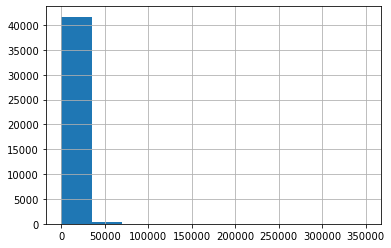

In [134]:
autos_df['price_dollars'].hist()

The distribution of the 'price_dollars' is right skewed. Based on this, the cars with price > Q3 + 1.5* iqr would not really be treated as outliers.. So we are not gonna use the outliers_clean here.. 
Q1 - 1.5*iqr is negative so it couldn't capture the 0 entries in price. This is to emphasize that it is very important to manually inspect the data while cleaning it, without blindly applying functions and formulas.


In [135]:
autos_df = autos_df[~((autos_df['price_dollars'] == 0)|(autos_df['price_dollars'] == 1))]

# III. Feature Selection and Engineering (Data Preparation)

We are now left with 13 variables: 3 numerical columns and 10 categorical variables. 

### Feature Selection
Further investigation is performed to eliminate any of these variables that might be poorly correlated with the target variable or their presence might degrade the model performance as well.

### Feature Engineering
To explore the benefits of engineering some of the features.

### A. Numerical Features

array([[<AxesSubplot:xlabel='price_dollars', ylabel='price_dollars'>,
        <AxesSubplot:xlabel='powerPS', ylabel='price_dollars'>,
        <AxesSubplot:xlabel='odometer_km', ylabel='price_dollars'>,
        <AxesSubplot:xlabel='Age_Car', ylabel='price_dollars'>],
       [<AxesSubplot:xlabel='price_dollars', ylabel='powerPS'>,
        <AxesSubplot:xlabel='powerPS', ylabel='powerPS'>,
        <AxesSubplot:xlabel='odometer_km', ylabel='powerPS'>,
        <AxesSubplot:xlabel='Age_Car', ylabel='powerPS'>],
       [<AxesSubplot:xlabel='price_dollars', ylabel='odometer_km'>,
        <AxesSubplot:xlabel='powerPS', ylabel='odometer_km'>,
        <AxesSubplot:xlabel='odometer_km', ylabel='odometer_km'>,
        <AxesSubplot:xlabel='Age_Car', ylabel='odometer_km'>],
       [<AxesSubplot:xlabel='price_dollars', ylabel='Age_Car'>,
        <AxesSubplot:xlabel='powerPS', ylabel='Age_Car'>,
        <AxesSubplot:xlabel='odometer_km', ylabel='Age_Car'>,
        <AxesSubplot:xlabel='Age_Car', ylabel='

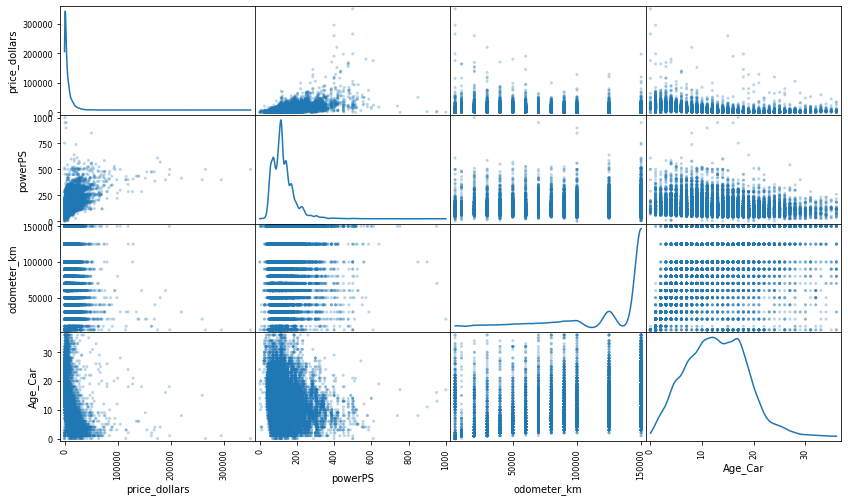

In [136]:
pd.plotting.scatter_matrix(autos_df,alpha = 0.3, figsize=(14,8), diagonal = 'kde')

Target variable 'price_dollars' in addition to features 'odomoter_km' and 'powerPS' are skewed distribution. The log transformation is explored. A relationship (positive) between powerPS and price_dollars is observed. However, the relationship between the target variable and other numerical features is not very visible. 

<AxesSubplot:>

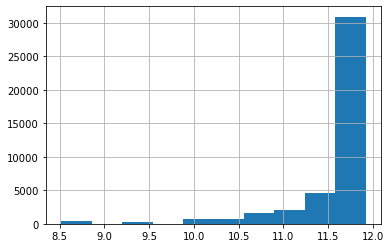

In [137]:
np.log(autos_df['odometer_km']).hist()

<AxesSubplot:>

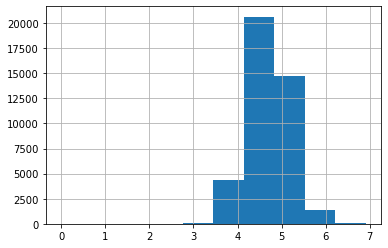

In [138]:
np.log(autos_df['powerPS']).hist()

<AxesSubplot:>

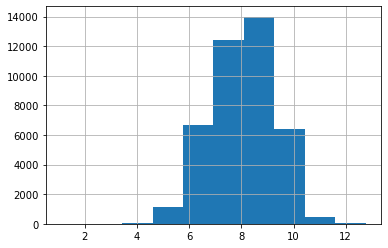

In [139]:

np.log(autos_df['price_dollars']).hist()

A log transformation of the target variable 'price_dollars' seems to be a good decision as the distribution became more or less normal-like after the log transformation.

In [140]:
autos_df['price_dollars'] = np.log(autos_df['price_dollars'])

array([[<AxesSubplot:xlabel='price_dollars', ylabel='price_dollars'>,
        <AxesSubplot:xlabel='powerPS', ylabel='price_dollars'>,
        <AxesSubplot:xlabel='odometer_km', ylabel='price_dollars'>,
        <AxesSubplot:xlabel='Age_Car', ylabel='price_dollars'>],
       [<AxesSubplot:xlabel='price_dollars', ylabel='powerPS'>,
        <AxesSubplot:xlabel='powerPS', ylabel='powerPS'>,
        <AxesSubplot:xlabel='odometer_km', ylabel='powerPS'>,
        <AxesSubplot:xlabel='Age_Car', ylabel='powerPS'>],
       [<AxesSubplot:xlabel='price_dollars', ylabel='odometer_km'>,
        <AxesSubplot:xlabel='powerPS', ylabel='odometer_km'>,
        <AxesSubplot:xlabel='odometer_km', ylabel='odometer_km'>,
        <AxesSubplot:xlabel='Age_Car', ylabel='odometer_km'>],
       [<AxesSubplot:xlabel='price_dollars', ylabel='Age_Car'>,
        <AxesSubplot:xlabel='powerPS', ylabel='Age_Car'>,
        <AxesSubplot:xlabel='odometer_km', ylabel='Age_Car'>,
        <AxesSubplot:xlabel='Age_Car', ylabel='

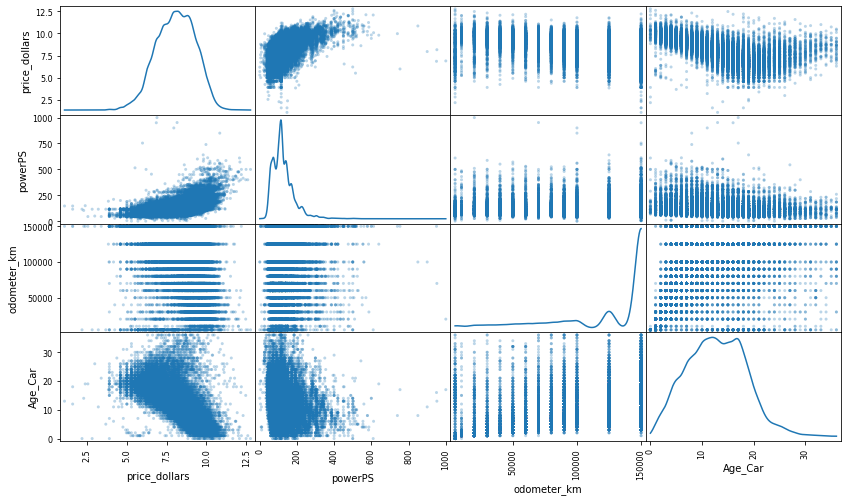

In [141]:
# Reruning the pairplot
pd.plotting.scatter_matrix(autos_df,alpha = 0.3, figsize=(14,8), diagonal = 'kde')

The relationship between target variable 'price_dollar' and powerPS and Age_Car became more visible after log transforming the price_dollars. Odometer_km variable is not really continuous, therefore, the relationship is not quite apparent. 

These relationships can be quantified using pearson's correlation by computing the correlation matrix of the numerical features. 

##### Quantifying relationships between numerical features and numerical target
###### i. Checking for Multicolinearity 

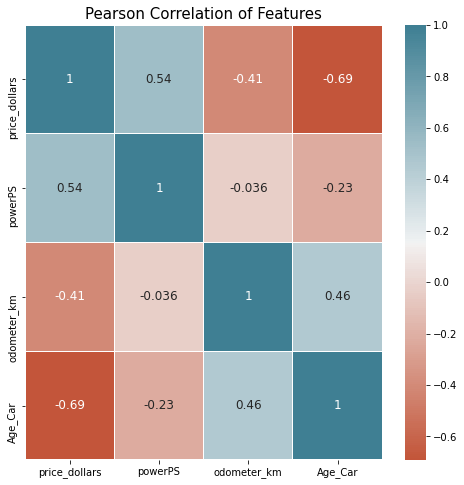

In [142]:
corr_matrix = autos_df.corr()
plt.figure(figsize=(8,8))
plt.title('Pearson Correlation of Features', size = 15)
colormap = sns.diverging_palette(10,220,as_cmap = True)

sns.heatmap(corr_matrix, 
            cmap = sns.diverging_palette(20, 220, n=200),
            annot = True,
           linewidths = 0.1, vmax = 1.0, linecolor='white',
           annot_kws = {'fontsize':12})
plt.show()

### We observe the following relationships from the correlation matrix:
- There is positive correlation between powerPS and price_dollars: the greater the horse power, the more expensive is the car
- The price of cars and the age are negatively correlated: Newer cars are more expensive
- There is a negative correlation between price of the car and the odometer reading: Cars with more miles/kms are cheaperr
- There is a positive correlation between the odometer reading and the age of the car, i.e. the longer the person has the car, the more miles/kms it was driven
- There is a negative correlation between age of the car and the horse power: Newer cars have greater horse power.

##### No multicolinearity detected between numerical features.
No features will be dropped.

In [143]:
## Not used

def multicolinearity_remov(df,threshold):
    
    """ Detects multicolinearity between numeric features of a dataframe drop features with correlation
        greater than threshold, usually 0.6-0.7
        
        Args:
        df (DataFrame): The Sliced DataFrame (Numeric features only)
        threshold: correlation threshold, above which, the features are colinear
        
        Returns:
        DataFrame
    """
    corr_matrix = df.corr()
    correlated_features = set()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # corr_threshold for features to be considered colinear: 0.6-0.7
                colname = corr_matrix.columns[i]
                colcompared = corr_matrix.columns[j]
                #check if the column compared against is not in the columns excluded list
                if colcompared not in correlated_features:
                   correlated_features.add(colname)
    df.drop(labels=correlated_features, axis=1, inplace=True)
    
    return df

##### ii. Checking for Low variance features

In [144]:
# Numerical features
cols = ['powerPS','odometer_km','Age_Car']
autos_df[cols].var()
# Very high variance which is good.. But just doing the routine check.

powerPS        3.607817e+03
odometer_km    1.521916e+09
Age_Car        3.401348e+01
dtype: float64

In [145]:
# Even though all the numerical features are correlated with the target 'price_dollars', we are going to run a routine 
# Check of low variance numerical features for elimination
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold


autos_df_copy = autos_df.copy()


# First, standarize
stand = StandardScaler()
autos_df_copy_stand = stand.fit_transform(autos_df_copy[cols])

print(autos_df_copy_stand[:,0].var())
print(autos_df_copy_stand[:,1].var())
print(autos_df_copy_stand[:,2].var())

sel = VarianceThreshold(threshold= 0.1) # At least a  threshold of 0.1 is required to keep the feature.
autos_copy_variance_threshold = sel.fit_transform(autos_df_copy_stand)
print(autos_copy_variance_threshold.shape)

1.0
0.9999999999999997
1.0000000000000002
(41281, 3)


##### No numeric feature dropped due to low variance

### B. Categorical Features

###### Predictive Power Score to find relationships between non-numeric columns

Advanges of using Predictive Power score over Pearson's correlation
- Prediction Power Score detects non linear relationship
- Finding relationship between non-numeric columns and between non-numeric columns with the target

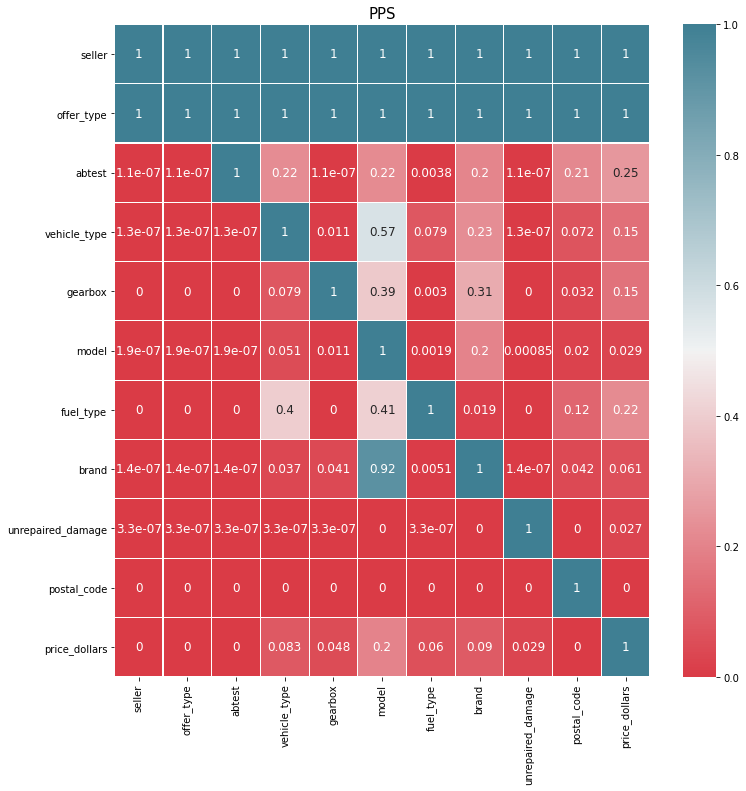

In [146]:
column_datatypes = autos_df.dtypes
categorical_columns = list(column_datatypes[column_datatypes=="object"].index.values)
total_cols = categorical_columns +['price_dollars']
corr_matrix = pps.matrix(autos_df[total_cols])
plt.figure(figsize=(12,12))
plt.title('PPS', size = 15)
colormap = sns.diverging_palette(10,220,as_cmap = True)

sns.heatmap(corr_matrix, 
            cmap = colormap,
            annot = True,
           linewidths = 0.1, vmax = 1.0, linecolor='white',
           annot_kws = {'fontsize':12})
plt.show()

In [147]:
# There is directionality in PPS. Here, we are looking for features 
corr_matrix.loc['price_dollars',:]

seller               0.000000
offer_type           0.000000
abtest               0.000000
vehicle_type         0.083047
gearbox              0.047908
model                0.199743
fuel_type            0.059642
brand                0.090159
unrepaired_damage    0.029188
postal_code          0.000000
price_dollars        1.000000
Name: price_dollars, dtype: float64

We can make the following observations from PPS:
- 'Seller', 'Offer_type','abtest' and 'postal_code' seem to have no/poorr relationship with the target or any other: candidate columns to be removed. For 'Seller' and 'Offer_type', as previously shown in categorical EDA abovee,is predominantly one-category feature and hence the relationship with target variable is 0. It's like a numerical column
with zero variance.
- The greatest relationship between the target variable/price and the categorical variable is with the car 'model'

- As expected, there is a strong relationship between model and brand, gearbox, fuel_type and vehicle_type. Later, to test, if brand need to be included in the model. How good is the predictive power of model on its own.

### Dropping categorical features with poor relationship to the target (aka, low predictive power)

In [148]:
cols_removed = ['seller','offer_type','postal_code','abtest']
autos_df.drop(cols_removed,axis = 1, inplace = True)

In [258]:
column_datatypes = autos_df.dtypes
categorical_columns =  list(column_datatypes[column_datatypes=="object"].index.values)
numerical_columns = list(column_datatypes[(column_datatypes=="float64")|(column_datatypes=="int64")].index.values)
print(categorical_columns)
print(numerical_columns)

['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'unrepaired_damage']
['price_dollars', 'powerPS', 'odometer_km', 'Age_Car']


# Building a predictive model

## Linear Model: Simple Linear Regression model
##### Baseline Model

##### Rearranging the order of the columns of the dataframes

In [259]:
# Moving the categorical columns to the begining of the dataframe
total_cols = categorical_columns + numerical_columns
data_df = autos_df.loc[:,total_cols]

In [260]:
from sklearn.model_selection import train_test_split

autos_data = data_df.copy()
autos_prices = autos_data.pop('price_dollars')

train_data, test_data, train_y, test_y = train_test_split(autos_data,autos_prices, test_size=0.2, random_state=0)

In [213]:
# One hot encoding of categorical features
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import FeatureUnion

## Passing the first 6 categorical columns to the function

cat_features = ColumnTransformer(transformers =[ 
    ('enc', OneHotEncoder(handle_unknown = 'ignore'), list(range(len(categorical_columns)))),  
], remainder ='passthrough') 

In [268]:
from sklearn import metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from pprint import pprint
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score


from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

regressor = Pipeline([('scaler',StandardScaler(with_mean=False)), ('regressor',LinearRegression())])



def regressor_model(X_train,X_test,y_train,y_test,features,regressor):
    
    pipe = Pipeline(steps =[ 
    ('ohe_cat', features),    
    ('model', regressor), 
     ])

    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    
    

    print('Training R^2:{}'.format(pipe.score(X_train,y_train)))
    print('Test R^2:{}'.format(pipe.score(X_test,y_test)))
    
  
    print('MSE: %f' % metrics.mean_squared_error(y_test, y_pred))
    print('MAE: %f' % metrics.mean_absolute_error(y_test, y_pred))
    
    # kfold cross-validation
    kf = KFold(5, shuffle=True, random_state=1)
    print('CV R^2:{}'. format(cross_val_score(pipe, autos_data,autos_prices, cv=kf).mean()))
    

In [215]:
# Calling the regressor_model function
regressor_model(train_data, test_data, train_y, test_y,cat_features,regressor)

Training R^2:0.7890755346206667
Test R^2:0.7849600426270439
MSE: 0.308289
MAE: 0.382075
CV R^2:0.7841956958685488


In [218]:
# The model performance is degraded a lot once we use the original 'price_dollars', not the log transformed as it increases
# the non linearity in the model
regressor_model(train_data, test_data, np.exp(train_y), np.exp(test_y),cat_features,regressor)

Training R^2:0.6965539787976237
Test R^2:0.6398785939580844
MSE: 28002022.342182
MAE: 2478.407114
CV R^2:0.6802028409924914


This is a baseline linear model (non regularized). 
Some of the tools used in the model need to be optimized by regularization. For instance, one hot encoder could not be 
used with drop='first'. 
According to sklearn documentation: "This is useful in situations where perfectly collinear features cause problems, such as when feeding the resulting data into a neural network or an unregularized regression.

However, dropping one category breaks the symmetry of the original representation and can therefore induce a bias in downstream models, for instance for penalized linear classification or regression models."

Additionally, due to the sparse matrix nature of the data following one hot encoding, the standardscaler has to be used with mean=False, centered at 0. 

In [191]:
# Random Search
from tempfile import mkdtemp
from shutil import rmtree
from scipy.stats import loguniform



def hypertune_model_random(X_train,X_test,y_train,y_test,features,regressor,param_grid):
    
    cachedir = mkdtemp()

    random_search = RandomizedSearchCV(regressor, param_grid, cv=5, n_jobs=-1,n_iter= 50, verbose = 1,random_state = 1)

    pipe = Pipeline(steps =[ 
    ('ohe_cat', cat_features),    
    ('random_search', random_search), 
     ])
    
    
    pipe.fit(X_train,y_train)
    rmtree(cachedir)

    print('Training R^2:{}'.format(pipe.score(X_train,y_train)))
    print('Test R^2:{}'.format(pipe.score(X_test,y_test)))
    print('Cross Validation (CV) R^2:{}'.format(pipe.named_steps['random_search'].best_score_))
    print(pipe.named_steps['random_search'].best_params_)

In [192]:
param_grid = {'regressor__solver' : ['svd', 'cholesky', 'lsqr', 'sag'],
              'regressor__alpha' : loguniform(1e-5, 100),
              'regressor__fit_intercept' : [True, False]
             }

In [193]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
regressor = Pipeline([('scaler',StandardScaler(with_mean=False)), ('regressor',ridge_reg)])

hypertune_model_random(train_data, test_data, train_y, test_y,cat_features,regressor,param_grid)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    7.0s finished


Training R^2:0.7889339692108293
Test R^2:0.7847147965674832
Cross Validation (CV) R^2:0.78352296510658
{'regressor__alpha': 21.077223804022868, 'regressor__fit_intercept': True, 'regressor__solver': 'sag'}


In [196]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(max_iter=10e5)
regressor = Pipeline([('scaler',StandardScaler(with_mean=False)), ('regressor',lasso_reg)])

param_grid = {
              'regressor__alpha' : loguniform(1e-5, 100),
              'regressor__fit_intercept' : [True, False]
             }

hypertune_model_random(train_data, test_data, train_y, test_y,cat_features,regressor,param_grid)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.2min finished


Training R^2:0.7886723951939033
Test R^2:0.7848600625070987
Cross Validation (CV) R^2:0.7836599311527829
{'regressor__alpha': 0.0004493894149083743, 'regressor__fit_intercept': False}


At best, the linear model, with regularization, performed with accuracy score around 78.49%.  One of the reasons due to the non-linear relationship exhibited by some of the numeric features such as 'odometer-km' in addition to the complexity added to the model by the presence of so many categorical features. 

##  Ensemble Model I: Random Forest Regressor

Here, we are using a benchmark plain random forest regressor with the random state set to 0 to ensure replicability. 
Such simple model would give us an idea whether an ensemble model is a good model or not for such dataset.

#### Baseline Ensemble Model

In [269]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state = 0)
regressor_model(train_data, test_data, train_y, test_y,cat_features,regressor)

Training R^2:0.9530070711540356
Test R^2:0.8328806974619769
MSE: 0.239588
MAE: 0.331607
CV R^2:0.8343165617965853


In [267]:
# We used the log of price_dollars to prepare the model for linear mode
# For an ensemble model, it might be better to use the original range of the data.
regressor = RandomForestRegressor(random_state = 0)
regressor_model(train_data, test_data, np.exp(train_y), np.exp(test_y),cat_features,regressor)

Training R^2:0.9762057315637148
Test R^2:0.8269774092848727
MSE: 13453747.457443
MAE: 1390.946831
CV R^2:0.8564002936100742


Even without any tuning of the hyperparameters, the ensemble model performance (in terms of accuracy score) exceeds that of the linear model on this particular dataset.

### The problem of categorical variables with tree ensemble models:
especially with categorical variables with so many levels as OHE (one hot encoding) introduces sparsity to the data It is usually not advisable to use with so many levels in tree models.
I tried different solutions.

##### Solution I: Assigning numbers to the category

In [270]:
df = autos_df.copy()
df['model'] = df['model'].astype('category')
l_ = list(df['model'].cat.codes)
df['model'] = l_
df['model'] = df['model'].astype('category')

In [271]:
df.head()

price_dollars vehicle_type    gearbox  powerPS  model  odometer_km  \
0       8.517193          bus     manual      158     40     150000.0   
1       9.047821    limousine  automatic      286     19     150000.0   
2       9.103868    limousine     manual      102    116      70000.0   
3       8.377931    small car  automatic       71    106      70000.0   
4       7.207860        kombi     manual      116    103     150000.0   

  fuel_type       brand unrepaired_damage  Age_Car  
0       lpg     peugeot                no     12.0  
1  gasoline         bmw                no     19.0  
2  gasoline  volkswagen                no      7.0  
3  gasoline       smart                no      9.0  
4  gasoline        ford                no     13.0

In [272]:
column_datatypes = df.dtypes
categorical_columns =  list(column_datatypes[column_datatypes=="object"].index.values)
numerical_columns = list(column_datatypes[(column_datatypes=="float64")|(column_datatypes=="int64")].index.values)
print(categorical_columns)
print(numerical_columns)

['vehicle_type', 'gearbox', 'fuel_type', 'brand', 'unrepaired_damage']
['price_dollars', 'powerPS', 'model', 'odometer_km', 'Age_Car']


In [273]:
# Moving the categorical columns to the begining of the dataframe
total_cols = categorical_columns + numerical_columns
df = df.loc[:,total_cols]

In [276]:
# Un-transformed 'price_dollars'
autos_data =   df.copy()
autos_prices = np.exp(autos_data.pop('price_dollars'))
train_data, test_data, train_y, test_y = train_test_split(autos_data,autos_prices, test_size=0.2, random_state=0)

In [280]:
regressor = RandomForestRegressor(random_state = 0)
regressor_model(train_data, test_data, train_y, test_y,cat_features,regressor)

Training R^2:0.9716697349806018
Test R^2:0.8108301184197978
MSE: 14709315.140962
MAE: 1502.936274
CV R^2:0.82730757599924


In [285]:
# Transformed 'price_dollars'
autos_data =   df.copy()
autos_prices = autos_data.pop('price_dollars')

train_data, test_data, train_y, test_y = train_test_split(autos_data,autos_prices, test_size=0.2, random_state=0)

In [286]:
regressor = RandomForestRegressor(random_state = 0)
regressor_model(train_data, test_data, train_y, test_y,cat_features,regressor)

Training R^2:0.9515329732155791
Test R^2:0.819397466102915
MSE: 0.258919
MAE: 0.346037
CV R^2:0.8239561163724701


##### Conclusion from Solution I:
Such solution did not seem to offer an advantage over OHE

### Dealing with overfitting: Tuning of the hyperparameters

Overfitting is a common problem with tree models.Ensemble tree models help to mitigate some of the overfitting. However, still more work needs to be done, especially with this kind of dataset with so many categorical levels.  The most trusted solution for this is hypertuning of the model parameters.

In [290]:
# Resetting data
column_datatypes = autos_df.dtypes
categorical_columns =  list(column_datatypes[column_datatypes=="object"].index.values)
numerical_columns = list(column_datatypes[(column_datatypes=="float64")|(column_datatypes=="int64")].index.values)

total_cols = categorical_columns + numerical_columns
data_df = autos_df.loc[:,total_cols]

autos_data = data_df.copy()
autos_prices = autos_data.pop('price_dollars')

train_data, test_data, train_y, test_y = train_test_split(autos_data,autos_prices, test_size=0.2, random_state=0)

To come up with the range of hypertuning parameters, each of the model hyperparamters is tuned separately by roughly testing the range of values. Once a value is identified, a more thorough search for the optimum value is performed. 

In [295]:
# Random Search
from tempfile import mkdtemp
from shutil import rmtree

def hypertune_model_random(X_train,X_test,y_train,y_test,features,regressor,param_grid):
    
    
    cachedir = mkdtemp()

    random_search = RandomizedSearchCV(regressor, param_grid, cv=5,n_jobs = None,n_iter= 30, verbose = 1)

    pipe = Pipeline(steps =[ 
    ('ohe_cat', cat_features),    
    ('random_search', random_search), 
     ])
    
    
    pipe.fit(X_train,y_train)
    rmtree(cachedir)

    print('Training R^2:{}'.format(pipe.score(X_train,y_train)))
    print('Test R^2:{}'.format(pipe.score(X_test,y_test)))
    print('Cross Validation (CV) R^2:{}'.format(pipe.named_steps['random_search'].best_score_))
    print(pipe.named_steps['random_search'].best_params_)

In [296]:
param_grid = {'max_depth':[20, 30, 40, 50, 60, 70, 80, 90, 100, None],
              'min_samples_leaf': range(1,4), # default 1
              'min_samples_split': range(2,7), # default 2
              'n_estimators':range(100,500,50), # 
              'max_features':['log2','sqrt','auto']}

regressor = RandomForestRegressor(random_state = 0)
hypertune_model_random(train_data, test_data, train_y, test_y,cat_features,regressor,param_grid)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 218.8min finished


Training R^2:0.9259418195817145
Test R^2:0.8443981450158762
Cross Validation (CV) R^2:0.840708764683664
{'n_estimators': 400, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40}


### Building and Fitting the model

In [297]:
regressor = RandomForestRegressor(n_estimators = 400, min_samples_leaf = 1 , min_samples_split = 4,max_features ='sqrt',max_depth = 40, random_state = 0)
regressor_model(train_data, test_data, train_y, test_y,cat_features,regressor)

Training R^2:0.9259418195817145
Test R^2:0.8443981450158762
MSE: 0.223077
MAE: 0.322760
CV R^2:0.8447163936282884


In [319]:
#List of Features used in the model after OHE of the categorical variables
numerical_columns.remove('price_dollars')

list_vehicle_type = list(autos_data['vehicle_type'].unique())
list_vehicle_type.sort()

list_gearbox = list(autos_data['gearbox'].unique())
list_gearbox.sort()

list_model = list(autos_data['model'].unique())
list_model.sort()

list_fuel = list(autos_data['fuel_type'].unique())
list_fuel.sort()

list_brand = list(autos_data['brand'].unique())
list_brand.sort()

list_unrep = list(autos_data['unrepaired_damage'].unique())
list_unrep.sort()

features_list = list_vehicle_type  + list_gearbox + list_model + list_fuel + list_brand + list_unrep + numerical_columns


## Feature Importance

In [316]:
# EnsembleModel+FeatureImportance Function

def ensemble_model_FeatImp(X,y,features_transformer,regressor,features_list,num_features_imp):
   
    
    business_model = Pipeline([
    
    ('features', features_transformer),
    # add your estimator here
    ('regressor',regressor)
     ])

    business_model.fit(X,y)
   
    
    importances = business_model['regressor'].feature_importances_
    indices = np.argsort(importances)[::-1] # descending order
    # Print the feature ranking
    print("Feature ranking:")

    for f in range(len(features_list[:num_features_imp])):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
    feat_imp = pd.Series(business_model['regressor'].feature_importances_, features_list).sort_values(ascending=False)[:20]
    feat_imp.plot(kind='bar', title='Feature Importances',)
    plt.ylabel('Feature Importance Score')  
       

Feature ranking:
1. feature 303 (0.339024)
2. feature 301 (0.167040)
3. feature 302 (0.105714)
4. feature 6 (0.033172)
5. feature 254 (0.032715)
6. feature 256 (0.026507)
7. feature 299 (0.025343)
8. feature 8 (0.022451)
9. feature 300 (0.021989)
10. feature 9 (0.020983)


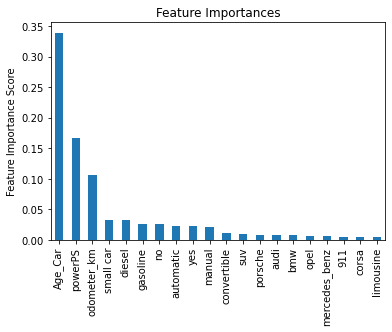

In [317]:
regressor = RandomForestRegressor(n_estimators = 400, min_samples_leaf = 1 , min_samples_split = 4,max_features ='sqrt',max_depth = 40, random_state = 0)
num_features_imp = 10
ensemble_model_FeatImp(autos_data,autos_prices,cat_features ,regressor,features_list,num_features_imp)

The numerical features, in the order of age of the car, power and mileage, are the major determinant of the price of the used cars. The 'model' of the car is not a strong determinant. 

## The problem of categorical variables with tree ensemble models


### Eliminating low frequency categories in 'model' by lumping them in other
##### Solution II

In [322]:
#Computing the range of the frequency of the models to get an idea....
model_s = autos_data['model'].value_counts(normalize=True, dropna = False).sort_values(ascending = False)

# We can start aggressively: by limiting it to 6000 cars minimum in a a category
Threshold = 0.02# 6000 cars minimum 
a = model_s >= Threshold
common_models = list(model_s[:sum(a)+1].index)
len(common_models) # 222: basically reducing the number of models to 12 (if thresold is 6000 cars frequency per model category)
# 13 with other

12

In [325]:
common_models

['golf',
 'andere',
 '3er',
 'polo',
 'corsa',
 'passat',
 'astra',
 'a4',
 'c_klasse',
 '5er',
 'e_klasse',
 'a3']

In [360]:
# Resetting data
column_datatypes = autos_df.dtypes
categorical_columns =  list(column_datatypes[column_datatypes=="object"].index.values)
numerical_columns = list(column_datatypes[(column_datatypes=="float64")|(column_datatypes=="int64")].index.values)

# Reordering the dataframe so that categorical columns go first
total_cols = categorical_columns + numerical_columns
data_df = autos_df.loc[:,total_cols]

autos_data_cp = data_df.copy()
autos_prices = autos_data_cp.pop('price_dollars')

In [328]:
# Lumping all categories of car models 'under threshold' in one category called 'other'
## Looping is slow and not ideal
for model_ in autos_data_cp['model']:
    
    if model_ not in common_models:
       autos_data_cp['model']= autos_data_cp['model'].str.replace(model_,'other')

In [329]:
autos_data_cp['model'].value_counts()

other       21977
golf         3370
andere       2976
3er          2491
polo         1466
corsa        1443
passat       1288
astra        1247
a4           1187
c_klasse     1093
5er          1070
e_klasse      908
a3            765
Name: model, dtype: int64

In [330]:
# Splitting data into train and test data
train_data, test_data, train_y, test_y = train_test_split(autos_data_cp,autos_prices, test_size=0.2, random_state=0)

# Retraining the model( with prior hyperparameters) with new features
regressor = RandomForestRegressor(n_estimators = 400, min_samples_leaf = 1 , min_samples_split = 4,max_features ='sqrt',max_depth = 40, random_state = 0)
regressor_model(train_data, test_data, train_y, test_y,cat_features,regressor)

Training R^2:0.9321181640567054
Test R^2:0.8414963330183072
MSE: 0.227237
MAE: 0.324956
CV R^2:0.8415000646028666


##### Lowering the number of 'model' categories from 212 to 13 by merging non frequent model in one category as 'other'
The model performance is really slightly degraded. For the next ensemble model, Gradient Boosting, the 'model' features will be reduced to 13 categories.

## Ensemble Model II: Gradient Boosting Regressor
###### Using the new dataset with merged 'model'

In [582]:
autos_data_cp.head()

vehicle_type    gearbox   model fuel_type       brand unrepaired_damage  \
0          bus     manual  andere       lpg     peugeot                no   
1    limousine  automatic     7er  gasoline         bmw                no   
2    limousine     manual    golf  gasoline  volkswagen                no   
3    small car  automatic  fortwo  gasoline       smart                no   
4        kombi     manual   focus  gasoline        ford                no   

   powerPS  odometer_km  Age_Car  
0      158     150000.0     12.0  
1      286     150000.0     19.0  
2      102      70000.0      7.0  
3       71      70000.0      9.0  
4      116     150000.0     13.0

In [586]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor(random_state = 0)

regressor_model(train_data, test_data, train_y, test_y,cat_features,regressor)

Training R^2:0.8303043204758151
Test R^2:0.821644638151715
MSE: 0.255697
MAE: 0.351166
CV R^2:0.8251112386729581


We are going to deal with overfitting with hypertuning the model.

### Tuning of the hyperparameters

Adopted from
https://github.com/aarshayj/analytics_vidhya/blob/master/Articles/Parameter_Tuning_GBM_with_Example/GBM%20model.ipynb

### First hypertuning the Tree specific parameters
* min_samples_split
* min_samples_leaf
* max_depth
* min_leaf_nodes
* max_features
* loss function

### Boosting parameters
* n_estimators
* learning rate
* subsample

Roughly, the range of each hyperparameter was determined separately via randomized search. Then, all the tree specific parameters ranges were passed together in a new randomized Search... Later, this process is repeated for a learning rate of 0.01

In [587]:
# Splitting data into train and test data
train_data, test_data, train_y, test_y = train_test_split(autos_data_cp,autos_prices, test_size=0.2, random_state=0)

param_grid = {'max_depth':[3,4,5,6,7,8,9,10,None], 
              'min_samples_leaf': range(1,6), #(2,6)
              'min_samples_split': range(2,10),#(6,10)
              'n_estimators':range(200,600,50), 
              'subsample':np.arange(0.7,0.9,0.05), 
              'max_features':['log2','sqrt','auto']}

regressor = GradientBoostingRegressor(random_state = 0)
hypertune_model_random(train_data, test_data, train_y, test_y,cat_features,regressor,param_grid)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 38.5min finished


Training R^2:0.8840202745955481
Test R^2:0.8544852539415226
Cross Validation (CV) R^2:0.8524532541114078
{'subsample': 0.9000000000000001, 'n_estimators': 250, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 6}


Hypertuning of the GradientBoostingRegressor improved the model performance from 0.82 to 0.85 (CV error). We are gonna changing the learning rate of the GradientBoostingRegressor to improve the performance even further.

### Approach for tackling the problem
* Tune the tree specific parameters for high learning rate
* Tune subsample
* Lower learning rate as much as possible computationally and increase the number of estimators accordingly.

In [588]:
# Repeating the hypertuning of the model, while making sure the learning rate is 0.1
regressor = GradientBoostingRegressor(learning_rate = 0.1, random_state = 0)
hypertune_model_random(train_data, test_data, train_y, test_y,cat_features,regressor,param_grid)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 88.4min finished


Training R^2:0.8907794534917025
Test R^2:0.8578211952545569
Cross Validation (CV) R^2:0.85336503316373
{'subsample': 0.8500000000000001, 'n_estimators': 450, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 6}


### Tuning the learning rate

#### Step I
halving the learning rate, doubling the n_estimators

In [592]:
regressor = GradientBoostingRegressor(learning_rate = 0.05, n_estimators = 450, min_samples_leaf = 5 , min_samples_split =7,max_features ='auto',max_depth = 6,subsample=0.85, random_state = 0)
regressor_model(train_data, test_data, train_y, test_y,cat_features,regressor)

Training R^2:0.8797094175166151
Test R^2:0.8554360098054079
MSE: 0.207252
MAE: 0.311419
CV R^2:0.8526204223939017


#### Step II

In [594]:
regressor = GradientBoostingRegressor(learning_rate = 0.025, n_estimators = 450, min_samples_leaf = 5 , min_samples_split =7,max_features ='auto',max_depth = 6,subsample=0.85, random_state = 0)
regressor_model(train_data, test_data, train_y, test_y,cat_features,regressor)

Training R^2:0.8695695055185658
Test R^2:0.8505763445959196
MSE: 0.214219
MAE: 0.317795
CV R^2:0.849234352726713


The performance of the modele decreases are the learning rate decreases, so we are choose learning rate of 0.05

## Feature Importance

In [596]:
numerical_columns.remove('price_dollars')

list_vehicle_type = list(autos_data_cp['vehicle_type'].unique())
list_vehicle_type.sort()

list_gearbox = list(autos_data_cp['gearbox'].unique())
list_gearbox.sort()

list_model = list(autos_data_cp['model'].unique())
list_model.sort()

list_fuel = list(autos_data_cp['fuel_type'].unique())
list_fuel.sort()

list_brand = list(autos_data_cp['brand'].unique())
list_brand.sort()

list_unrep = list(autos_data_cp['unrepaired_damage'].unique())
list_unrep.sort()

features_list = list_vehicle_type  + list_gearbox + list_model + list_fuel + list_brand + list_unrep + numerical_columns


Feature ranking:
1. feature 303 (0.644241)
2. feature 301 (0.191633)
3. feature 302 (0.020092)
4. feature 6 (0.018411)
5. feature 299 (0.014426)
6. feature 300 (0.012931)
7. feature 2 (0.011914)
8. feature 227 (0.008517)
9. feature 297 (0.007263)
10. feature 280 (0.005110)


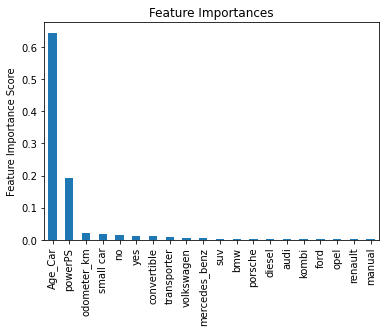

In [597]:
regressor = GradientBoostingRegressor(learning_rate = 0.05, n_estimators = 450, min_samples_leaf = 5 , min_samples_split =7,max_features ='auto',max_depth = 6,subsample=0.85, random_state = 0)
num_features_imp = 10
ensemble_model_FeatImp(autos_data_cp,autos_prices,cat_features ,regressor,features_list,num_features_imp)

## Conclusion

After a series of feature engineering consisting of: 1.Extracting information from 'year', 2. eliminating irrelevant columns, 3. eliminating low variance columns (either numerical or categorical) 4. eliminating columns with low predictive power, we were able to reduce the model from 19 features to 10 features, which greatly reduces the model complexity and speeds up computation time. 

This dataset needed serious data cleaning due the following facts: 1. Many missing data 2. Erroneous values of 0 and others. A conservative approach of eliminating missing rowsof erroneous data was chosen in some instances, such as with entries of 0 in 'price_dollars', to avoid introducing noise and inaccuracy to the predictive model. 

Such decision reduced the number of observations from $50k  to  $41.281k.  

A baseline model of linear regression performed around 0.78 of accuracy. The performance of ensemble models was significantly greater as the accuracy in the case of 

a. RandomForrest, 0.845 

b. GradientBoosting, 0.85 (even after reducing the model category to 12 categories only). 
Interestingly, there is a match in the ranking of top 2 features importance for prediction among these 2 models. 


Interestingly, the model performance of RandomForest Regressor did not degrade much at all when the non popular categories of model were lumped in 'other' category and the number of models was reduced from 222 to 13. Therefore, for the Gradient Boosting model, we used the reduced 'model' feature of the dataset instead.

# Part II: Quantitative Analysis/Data Visualization

## Identification of  the most common brands

In [332]:
# To know the most common brand 
autos_data['brand'].value_counts(normalize=True).sort_values(ascending = False)     

volkswagen       0.210993
bmw              0.113272
opel             0.106369
mercedes_benz    0.098786
audi             0.090599
ford             0.068506
renault          0.047819
peugeot          0.029699
fiat             0.024684
seat             0.018604
skoda            0.017466
nissan           0.015867
mazda            0.015261
smart            0.014583
citroen          0.014074
toyota           0.013178
hyundai          0.010126
mini             0.009326
volvo            0.009278
mitsubishi       0.008212
honda            0.007703
kia              0.007170
alfa_romeo       0.006516
porsche          0.006250
suzuki           0.006177
chevrolet        0.005378
chrysler         0.003561
dacia            0.002810
daihatsu         0.002519
jeep             0.002277
land_rover       0.002204
subaru           0.002156
saab             0.001696
jaguar           0.001647
daewoo           0.001550
rover            0.001357
lancia           0.001042
trabant          0.000799
lada        

## Top brand/Most Popular brand criteria: greater than 1.5% of the listings 

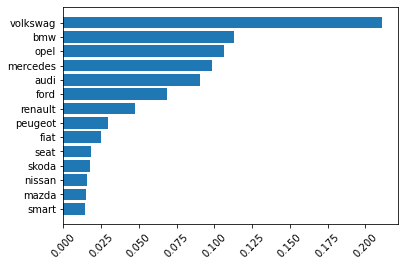

In [351]:
# Top brands with frequency > =1.5%
brand_top = data_df['brand'].value_counts(normalize=True).sort_values(ascending = False) 
a = brand_top >= 0.015
top_brands = list((brand_top[:sum(a)+1].index))

top_brands_nameadj = [top_brands[i][:8] for i in range(len(top_brands))]
plt.barh(top_brands_nameadj[::-1], brand_top[:sum(a)+1][::-1])
plt.xticks(rotation=45)
plt.show()

Volkswagen is the most popular brand in Germany based on its frequency of listings in Used Car ads on Craigslist. It is followed by other German brands such as bmw,mercedes_benz, opel and audi. 

# Numerical Features of Top Brands

## Average Price of Top Brands

In [361]:
# Recovering the original price of cars
data_df['price_dollars'] = np.exp(data_df['price_dollars'])

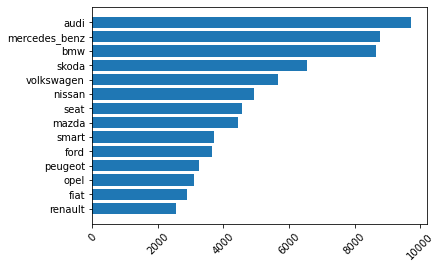

In [367]:
mean_price_top_brands =[]
autos_brand_meanprice = data_df.groupby('brand')['price_dollars'].mean()

for brand in top_brands:
    mean_price_top_brands.append(autos_brand_meanprice[brand])
  
top_brand_av_price_tup = list((zip(top_brands,mean_price_top_brands)))
dict_top_brand_av_price = dict((zip(top_brands,mean_price_top_brands)))
top_brand_av_price_tup.sort(key = lambda x: x[1])   


top_brand_sorted    = [top_brand_av_price_tup[i][0] for i in range(len(top_brand_av_price_tup))]
av_price_top_sorted = [top_brand_av_price_tup[i][1] for i in range(len(top_brand_av_price_tup))]

# Plot
plt.barh(top_brand_sorted,av_price_top_sorted)
plt.xticks(rotation=45)
plt.show()

For the most common/popular cars on the Used Car listing, the most expensive car was audi and it costs around $10000

## Average mileage for top brand

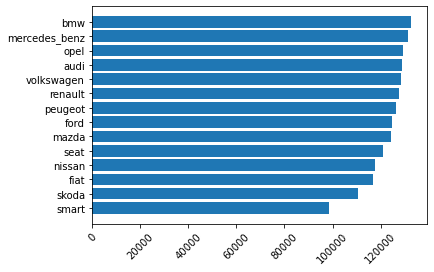

In [368]:
# Sorting
mean_mileage_top_brands = []
autos_brand_meanmileage = data_df.groupby('brand')['odometer_km'].mean()
for brand in top_brands:
    mean_mileage_top_brands.append(autos_brand_meanmileage[brand])
    
top_brand_av_mileage_tup = list((zip(top_brands,mean_mileage_top_brands)))
dict_top_brand_av_mileage = dict((zip(top_brands,mean_mileage_top_brands)))
top_brand_av_mileage_tup.sort(key = lambda x: x[1])   


top_brand_sorted      = [top_brand_av_mileage_tup[i][0] for i in range(len(top_brand_av_mileage_tup))]
av_mileage_top_sorted = [top_brand_av_mileage_tup[i][1] for i in range(len(top_brand_av_mileage_tup))]


plt.barh(top_brand_sorted,av_mileage_top_sorted)
plt.xticks(rotation=45)
plt.show()

Most of the most common cars in general have the same mileage. That explains that odometer did not have a high predictor value. 

## Average 'Age_Car' of top brands

The 'oldest' car on the listing is trabant and on average it's 25 years old! The other 'older' brands on the list on average are between 10-13 y old.

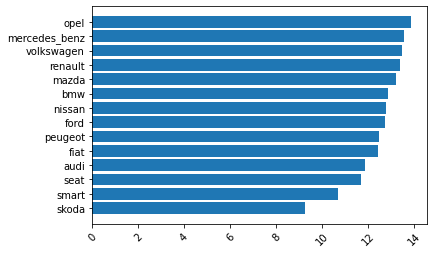

In [369]:
autos_brand_meanage = data_df.groupby('brand')['Age_Car'].mean()
mean_age_top_brands = []
for brand in top_brands:
    mean_age_top_brands.append(autos_brand_meanage[brand])

top_brand_av_age_tup = list(zip(top_brands,mean_age_top_brands))
dict_top_brand_av_age = dict((zip(top_brands,mean_age_top_brands)))
top_brand_av_age_tup.sort(key = lambda x: x[1])   


top_brand_sorted      = [top_brand_av_age_tup[i][0] for i in range(len(top_brand_av_age_tup))]
av_age_top_sorted     = [top_brand_av_age_tup[i][1] for i in range(len(top_brand_av_age_tup))]


plt.barh(top_brand_sorted,av_age_top_sorted)
plt.xticks(rotation=45)
plt.show()

It seems on average people who own the popular cars, like to own them for 10-12 years.

## Average 'powerPS' of top brands

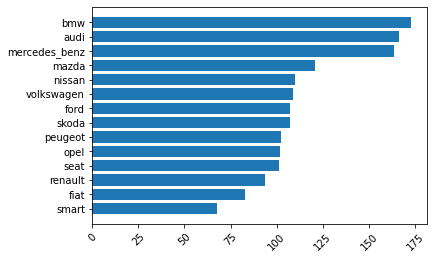

In [371]:
autos_brand_meanpower = data_df.groupby('brand')['powerPS'].mean()
mean_power_top_brands = []
for brand in top_brands:
    mean_power_top_brands.append(autos_brand_meanpower[brand])

top_brand_av_power_tup = list(zip(top_brands,mean_power_top_brands))
dict_top_brand_av_power = dict((zip(top_brands,mean_power_top_brands)))
top_brand_av_power_tup.sort(key = lambda x: x[1])   


top_brand_sorted      = [top_brand_av_power_tup[i][0] for i in range(len(top_brand_av_power_tup))]
av_power_top_sorted     = [top_brand_av_power_tup[i][1] for i in range(len(top_brand_av_power_tup))]


plt.barh(top_brand_sorted,av_power_top_sorted)
plt.xticks(rotation=45)
plt.show()

### Mileage and Price for top brands

In [375]:
### Mileage and Price for top brands
# converting both dictionaries to series
top_brand_av_price_series = pd.Series(dict_top_brand_av_price)
top_brand_av_mileage_series = pd.Series(dict_top_brand_av_mileage)
top_brand_av_age_series = pd.Series(dict_top_brand_av_age)
top_brand_av_power_series = pd.Series(dict_top_brand_av_power)
top_brand_df = pd.DataFrame(top_brand_av_price_series, columns=['mean_price'])
top_brand_df['mean_price'] = top_brand_av_price_series
top_brand_df['mean_mileage'] = top_brand_av_mileage_series
top_brand_df['mean_age'] = top_brand_av_age_series 
top_brand_df['mean_power'] = top_brand_av_power_series
top_brand_df

mean_price   mean_mileage   mean_age  mean_power
volkswagen     5656.920666  128586.681975  13.498967  108.765901
bmw            8656.756202  132576.988879  12.857571  172.698888
opel           3111.549305  129307.674789  13.866545  101.968344
mercedes_benz  8783.201569  131169.691025  13.566209  163.577734
audi           9718.572193  128758.021390  11.875936  165.976471
ford           3657.853607  124773.691655  12.751414  107.140028
renault        2547.030395  127684.903749  13.404255   93.449848
peugeot        3247.455139  126513.050571  12.466558  102.118271
fiat           2886.145240  116928.361138  12.429833   82.926398
seat           4574.734375  120937.500000  11.688802  101.333333
skoda          6556.038835  110402.219140   9.239945  107.131761
nissan         4933.777099  117717.557252  12.763359  110.174046
mazda          4439.031746  124214.285714  13.211111  120.695238
smart          3709.593023   98529.900332  10.714286   67.842193

# Categorical representation among the top brands

##  Gearbox

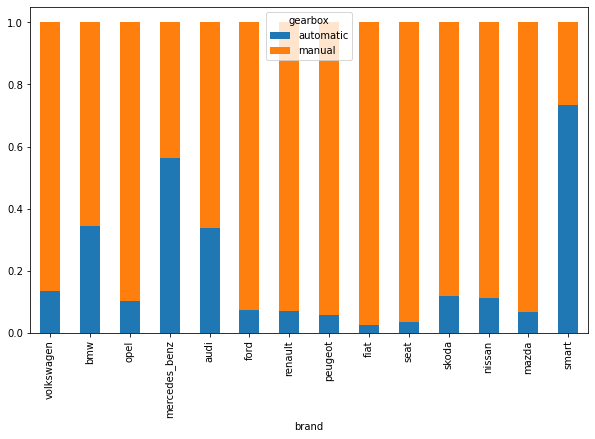

In [376]:
grouping_top = data_df.groupby('brand')['gearbox'].value_counts(normalize = True)
grouping_top.loc[top_brands].unstack().plot(kind='bar', stacked = True, figsize=(10,6))
plt.show()

## Vehicle Type

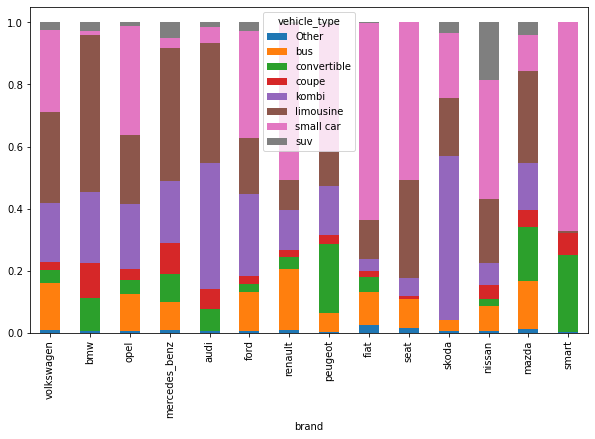

In [377]:
grouping_top = data_df.groupby('brand')['vehicle_type'].value_counts(normalize = True)
grouping_top.loc[top_brands].unstack().plot(kind='bar', stacked = True, figsize=(10,6))
plt.show()
# It seems that there is a wide distribution of different vehicle_types, among the most popular brands ranging from small car, to convertible to SUV.... 

## Fuel Type

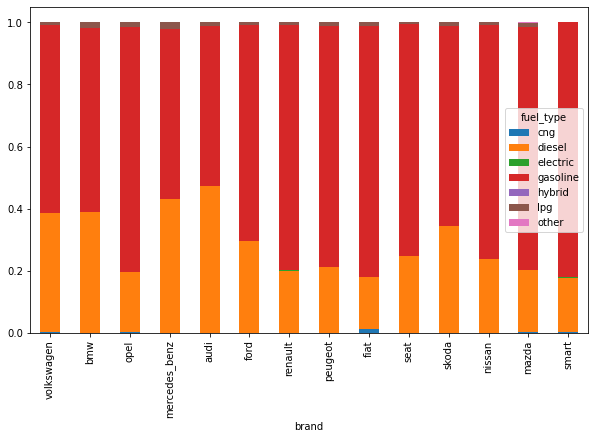

In [378]:
grouping_top = data_df.groupby('brand')['fuel_type'].value_counts(normalize = True)
grouping_top.loc[top_brands].unstack().plot(kind='bar', stacked = True, figsize=(10,6))
plt.show()
# It seems that there is a predominance of vehicles with gasoline, as fuel, among the most popular brands.

#### Observations
- Among top brands, a manual gearbox is more common
- Among top brands, there is a wide distribution of different vehicle_types, with some strong presence of small cars
- Among top brands, Gasoline fueled cars have a predominance up to 2016.

### Most popular brand-model combo

In [379]:
# Combination of brand and model that's most common
df_brand_model = data_df.groupby(['brand','model'])['price_dollars'].count().sort_values(ascending = False)
top_brand_model_l = list(df_brand_model.index)
percent_top_brand_model = ((df_brand_model.to_list())/np.sum(df_brand_model.to_list()))*100
a = percent_top_brand_model >= 1.5
top_brands_models = top_brand_model_l[:sum(a)+1]
display(top_brands_models)

[('volkswagen', 'golf'),
 ('bmw', '3er'),
 ('volkswagen', 'polo'),
 ('opel', 'corsa'),
 ('volkswagen', 'passat'),
 ('opel', 'astra'),
 ('audi', 'a4'),
 ('mercedes_benz', 'c_klasse'),
 ('bmw', '5er'),
 ('mercedes_benz', 'e_klasse'),
 ('audi', 'a3'),
 ('audi', 'a6'),
 ('ford', 'focus'),
 ('ford', 'fiesta'),
 ('volkswagen', 'transporter'),
 ('peugeot', '2_reihe')]

## Average numeric features of brands

#### A. Av Price per brand

Text(0, 0.5, 'price $')

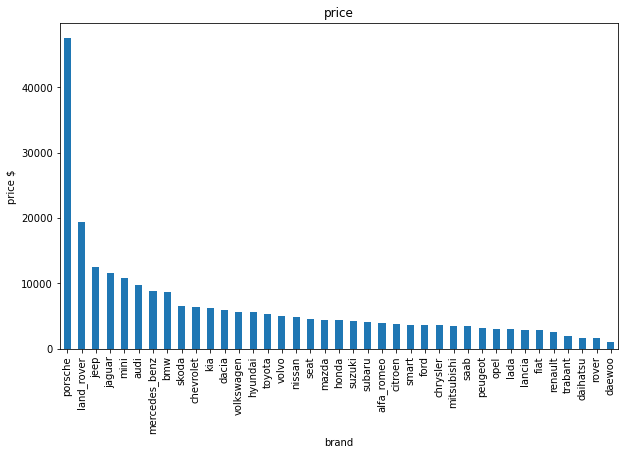

In [381]:
grouping_brand_price = data_df.groupby('brand')['price_dollars'].mean().sort_values(ascending = False)
grouping_brand_price.plot(kind='bar', stacked = True, figsize=(10,6))
plt.title('price')
plt.ylabel('price $')

#### B. Av PowerPS per brand

Text(0, 0.5, 'power PS')

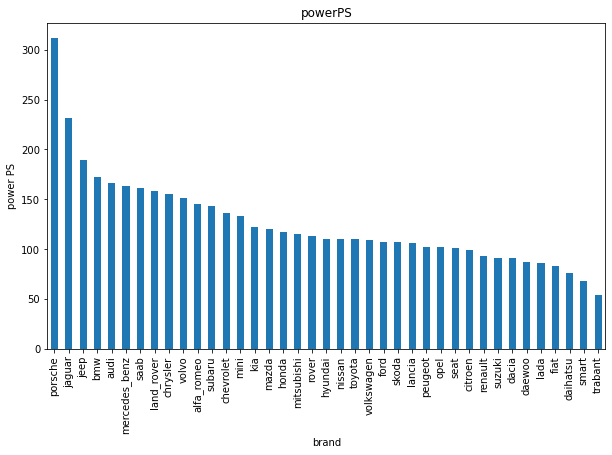

In [384]:
grouping_brand_power = data_df.groupby('brand')['powerPS'].mean().sort_values(ascending = False)
grouping_brand_power.plot(kind='bar', stacked = True, figsize=(10,6))
plt.title('powerPS')
plt.ylabel('power PS')

#### C. Av Mileage per brand

Text(0, 0.5, 'mileage [km]')

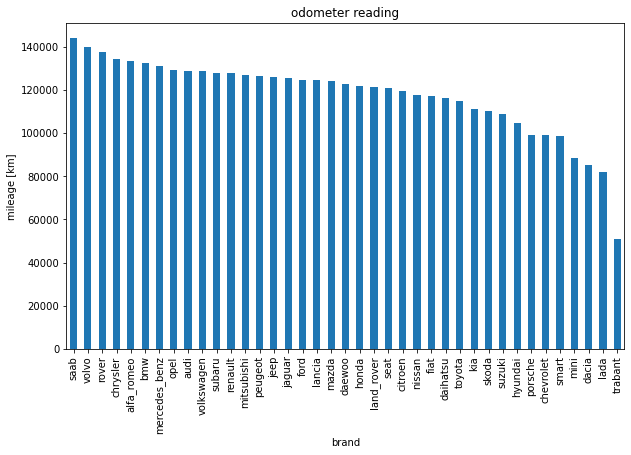

In [386]:
grouping_brand_odom = data_df.groupby('brand')['odometer_km'].mean().sort_values(ascending = False)
grouping_brand_odom.plot(kind='bar', stacked = True, figsize=(10,6))
plt.title('odometer reading')
plt.ylabel('mileage [km]')

#### D. Av Age per brand

Text(0, 0.5, 'Age [ys]')

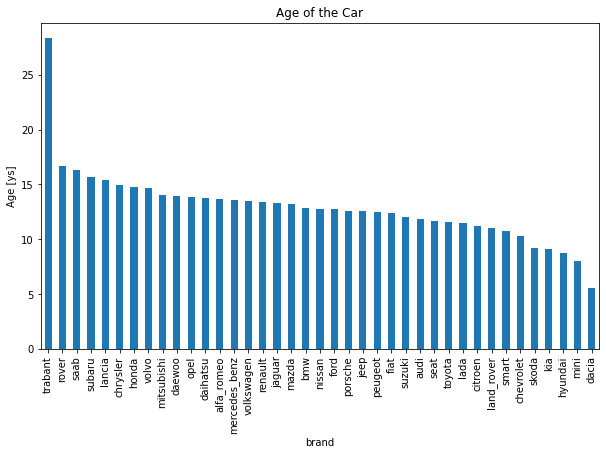

In [388]:
grouping_brand_age = data_df.groupby('brand')['Age_Car'].mean().sort_values(ascending = False)
grouping_brand_age.plot(kind='bar', stacked = True, figsize=(10,6))
plt.title('Age of the Car')
plt.ylabel('Age [ys]')

#### E. Av yearly mileage [odometer/age]  per brand

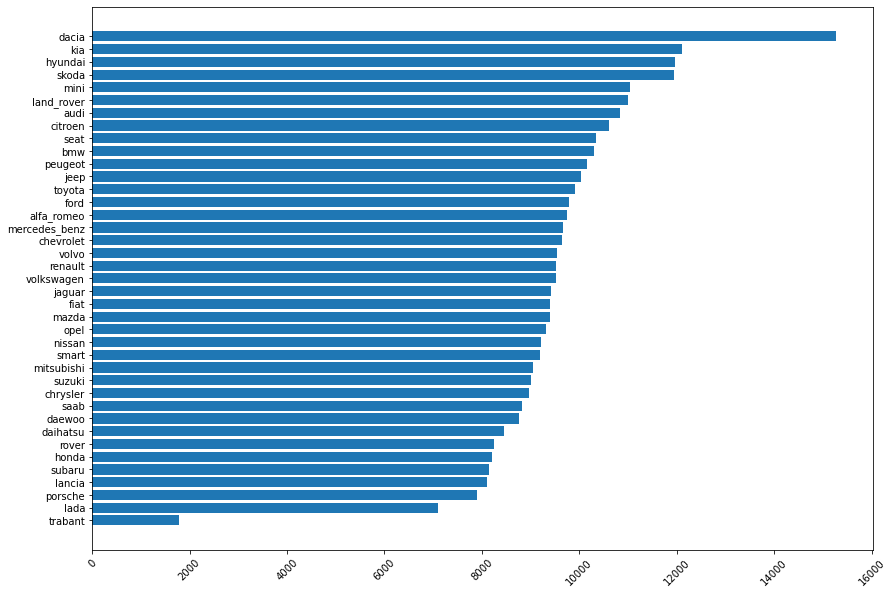

In [394]:
# odometer
grouping_av_brand = list(grouping_brand_odom.index)
grouping_av_odom  = grouping_brand_odom.to_list()



brand_av_odom_tup = list((zip(grouping_av_brand,grouping_av_odom )))
brand_av_odom_tup.sort(key = lambda x: x[0])   


brand_sorted_odom    = [brand_av_odom_tup[i][0] for i in range(len(brand_av_odom_tup))]
odom_sorted     = [brand_av_odom_tup[i][1] for i in range(len(brand_av_odom_tup))]

# Age
grouping_av_brand = list(grouping_brand_age.index)
grouping_av_age  = grouping_brand_age.to_list()



brand_av_age_tup = list((zip(grouping_av_brand,grouping_av_age )))
brand_av_age_tup.sort(key = lambda x: x[0])   


brand_sorted_age    = [brand_av_age_tup[i][0] for i in range(len(brand_av_age_tup))]
age_sorted     = [brand_av_age_tup[i][1] for i in range(len(brand_av_age_tup))]


# same order for brand_sorted_age and brand_sorted
assert brand_sorted_age == brand_sorted_odom

# define: yearly mileage[km]
yearly_mileage = np.array(odom_sorted)/np.array(age_sorted)

# Sorting
brand_mileage_tup = list(zip(brand_sorted_age,yearly_mileage))
brand_mileage_tup.sort(key = lambda x: x[1])   

brand_sorted             = [brand_mileage_tup[i][0] for i in range(len(brand_mileage_tup))]
brand_mileage_sorted     = [brand_mileage_tup[i][1] for i in range(len(brand_mileage_tup))]

plt.figure(figsize =(14,10))
plt.barh(brand_sorted ,brand_mileage_sorted)
plt.xticks(rotation=45)
plt.show()

In general, cheaper cars such as hyndai, dacia, kia.. are used more during their ownership than more expensive cars such as jaguar, mercedes, porsche. 

### Grouping the odometer data into Buckets to detect a relationship with price_dollars

As shown in the pairplot, the 'odometer_km' data did not seem continous. Therefore, the relationship between the odometer and the price was blurred. A better idea for non continuous data is to bucket it.

In [396]:
bins = [0, 100000, 125000, 150000]
data_df['odometer_bin'] = pd.cut(data_df['odometer_km'],bins)
np.histogram(data_df['odometer_km'],bins)

(array([ 8529,  1810, 30942]), array([     0, 100000, 125000, 150000]))

In [397]:
data_df.groupby('odometer_bin')['price_dollars'].mean()

odometer_bin
(0, 100000]         11866.552084
(100000, 125000]     6319.053081
(125000, 150000]     3909.051781
Name: price_dollars, dtype: float64

The clear relationship which is obvious is that car with lower mileage are listed for higher price. 

# Part III. Unsupervised Learning: Used Cars Market segmentation by product

Following an unsupervised approach to analyze the data would allow us to reveal hidden and new patterns in the data. The analysis of the UsedCars data is indeed useful for both consumers and manufacturers as following:

- Manufactures: The business leaders would have an idea of how the car is used: how long the consumer tends to keep the car before buying a new one, how many miles on average the car is used for a certain period.  Knowing the car usage information would help the manufactures make decision on ensuring the car performance is optimized for the average duration of car usage. 

- Consumers: this dataset is imperative to help some consumers decide on whether to lease or to buy a car. It is important to know how much price is influenced by the Age and by the mileage of the car. Based on the consumer's usage of the car, this data will help him/her decide the car with the best value of the money.

### Algorithm: GMM ( Gaussian Mixture Models)
The model attempts to find a mixture of multi-dimentional Gaussian probability Distributions. As shown in the pairplot above, 'Age_Car' distribution is more or less normal. 'powerPS'and 'Odometer' are skewed distributions. Inspite this, we are gonna attempt using the GMM model for clustering as our first model of choicetransforming some of the numeric features to normal using log transformation or BoxCox transforrmation for instance.

In [398]:
data_df.head()

vehicle_type    gearbox   model fuel_type       brand unrepaired_damage  \
0          bus     manual  andere       lpg     peugeot                no   
1    limousine  automatic     7er  gasoline         bmw                no   
2    limousine     manual    golf  gasoline  volkswagen                no   
3    small car  automatic  fortwo  gasoline       smart                no   
4        kombi     manual   focus  gasoline        ford                no   

   price_dollars  powerPS  odometer_km  Age_Car      odometer_bin  
0         5000.0      158     150000.0     12.0  (125000, 150000]  
1         8500.0      286     150000.0     19.0  (125000, 150000]  
2         8990.0      102      70000.0      7.0       (0, 100000]  
3         4350.0       71      70000.0      9.0       (0, 100000]  
4         1350.0      116     150000.0     13.0  (125000, 150000]

### Algorithm: GMM ( Gaussian Mixture Models)
The model attempts to find a mixture of multi-dimentional Gaussian probability Distributions. As shown in the pairplot above, 'Age_Car' distribution is more or less normal. 'powerPS'and 'Odometer' are skewed distributions and 'unrepaire_damage' is a numerical column 0 or 1 with an underlying categorical representation. Inspite this, we are gonna attempt using the GMM model for clustering as our first model of choice. A more refined approach would involve transforming some of the numeric features to normal using log transformation or BoxCox transforrmation for instance.

###### Log Transforming powerPS and odometer_km 

#data_df['odometer_km'] = np.log(data_df['odometer_km'])
#data_df['powerPS'] = np.log(data_df['powerPS'])

Log transformation of 'odometer_km' and 'powerPS' is done within the pipeline via columntransformers

In [530]:
# Reloading and resetting data
column_datatypes = autos_df.dtypes
categorical_columns =  list(column_datatypes[column_datatypes=="object"].index.values)
numerical_columns = list(column_datatypes[(column_datatypes=="float64")|(column_datatypes=="int64")].index.values)

# Reordering the dataframe so that categorical columns go first
total_cols = categorical_columns + numerical_columns
data_df = autos_df.loc[:,total_cols]
data_df['unrepaired_damage'] = data_df['unrepaired_damage'].str.replace('yes','1').str.replace('no','0').astype('int64')
data_df['price_dollars'] = np.exp(data_df['price_dollars'])

In [531]:
data_df.head()

vehicle_type    gearbox   model fuel_type       brand  unrepaired_damage  \
0          bus     manual  andere       lpg     peugeot                  0   
1    limousine  automatic     7er  gasoline         bmw                  0   
2    limousine     manual    golf  gasoline  volkswagen                  0   
3    small car  automatic  fortwo  gasoline       smart                  0   
4        kombi     manual   focus  gasoline        ford                  0   

   price_dollars  powerPS  odometer_km  Age_Car  
0         5000.0      158     150000.0     12.0  
1         8500.0      286     150000.0     19.0  
2         8990.0      102      70000.0      7.0  
3         4350.0       71      70000.0      9.0  
4         1350.0      116     150000.0     13.0

In [535]:
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Numerical features...

numeric_cols = ['powerPS','odometer_km','Age_Car','unrepaired_damage']
            
class ColumnTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if not isinstance(X, pd.DataFrame):# if not a dataframe, convert to a data frame...
            X = pd.DataFrame(X) 
        X = X[self.columns]
        X[self.columns[0:2]] = np.log(X[self.columns[0:2]])
        X[self.columns[2:4]] = X[self.columns[2:4]]
        
        return X[self.columns].to_numpy()


In [536]:
numeric_features = Pipeline([
     ('cst',ColumnTransformer(numeric_cols))
])

In [537]:
business_features = FeatureUnion([
    ('numeric', numeric_features),

])
business_features.fit_transform(data_df)

array([[ 5.06259503, 11.91839057, 12.        ,  0.        ],
       [ 5.65599181, 11.91839057, 19.        ,  0.        ],
       [ 4.62497281, 11.15625052,  7.        ,  0.        ],
       ...,
       [ 4.73619845, 11.91839057, 16.        ,  1.        ],
       [ 4.31748811, 11.91839057, 13.        ,  0.        ],
       [ 4.21950771, 11.91839057, 15.        ,  0.        ]])

In [538]:
numeric_features

Pipeline(steps=[('cst',
                 ColumnTransformer(columns=['powerPS', 'odometer_km', 'Age_Car',
                                            'unrepaired_damage']))])

In [539]:
#Let's start by clustering only based on the numerical features
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

scores = {}
for i in range(2,7):
    clustering_model = Pipeline([('scaler',StandardScaler()), ('clust',GaussianMixture(random_state=42, n_components=i))])

    business_model = Pipeline([
      ('features', numeric_features),
    # add your estimator here
      ('estimator',clustering_model)
     ])

    X = data_df
    
    business_model.fit(X)
    
    preds = business_model.predict(X)

   # Find the cluster centers
    centers = business_model['estimator']['clust'].means_

   # silhouette score
    good_data_t = scaler.fit_transform(X[numeric_cols])
    score = silhouette_score(good_data_t, preds)
    scores[i] = score
    print('Silhouette score is: ' + str(score), '\n')
    
print('Scores: ' + str(scores))
    

Silhouette score is: 0.4902589920439274 

Silhouette score is: 0.429276433951086 

Silhouette score is: 0.34066667126671285 

Silhouette score is: 0.27386437277687586 

Silhouette score is: 0.23972793307407958 

Scores: {2: 0.4902589920439274, 3: 0.429276433951086, 4: 0.34066667126671285, 5: 0.27386437277687586, 6: 0.23972793307407958}


### Elbow Plot

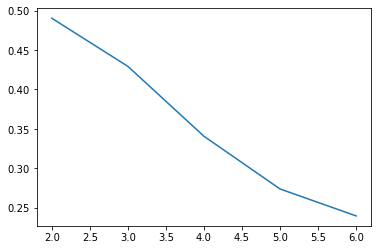

In [540]:
scores_l = [scores[i] for i in range(2,7)]
cluster_size = list(range(2,7))
plt.plot(cluster_size,scores_l)

In [541]:
# After deciding that 4 clusters is the best option
clusterer = GaussianMixture(random_state = 42, n_components = 5)
cols = ['Age_Car','powerPS','odometer_km','unrepaired_damage']
clusterer.fit(good_data_t)

# predict the cluster/label for each data point
preds = clusterer.predict(good_data_t)


# Find the cluster centers
centers = clusterer.means_
print('Cluster Center:' + str(centers))
 

Cluster Center:[[-1.25045861e-01 -2.37949753e-02 -1.73983306e-01 -3.24692525e-01]
 [ 8.12426605e-01 -1.73326222e+00 -1.32794119e+00 -3.24692525e-01]
 [-1.95330910e-01  2.52008988e-01  4.00440031e-01  3.07983684e+00]
 [-1.94817952e-03  6.17045561e-01  2.85325962e-01 -3.24692525e-01]
 [-3.53501385e-01 -1.43258334e+00 -3.62932694e-01 -3.24692525e-01]]


### Inverse Standarization

In [543]:
# Inverse Standardization: Mapping the centers to the non_normalized data
true_centers = scaler.inverse_transform(centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(true_centers))]
#true_centers_df = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers_df = pd.DataFrame(np.round(true_centers), columns = ['powerPS','odometer_km','Age_Car','unrepaired_damage'])
true_centers_df.index = segments
display(true_centers_df)

powerPS  odometer_km  Age_Car  unrepaired_damage
Segment 0    119.0     125000.0     12.0               -0.0
Segment 1    175.0      58312.0      5.0               -0.0
Segment 2    115.0     135759.0     15.0                1.0
Segment 3    126.0     150000.0     15.0               -0.0
Segment 4    105.0      70041.0     11.0                0.0

In [544]:
# To label data
# To properly concatenate without changing the indices


clusters_s = pd.Series(preds)
clusters_s.index = data_df.index


labelled_data = pd.concat([data_df, clusters_s], axis=1)
labelled_data.rename(columns={0: 'clusters_labels'}, inplace = True)



price_clusters = labelled_data.groupby('clusters_labels')['price_dollars'].mean()
price_clusters_df = pd.DataFrame(price_clusters,columns=['price_dollars'])
price_clusters_df.index = segments
true_centers_df = pd.concat([true_centers_df,price_clusters_df], axis = 1)
display(true_centers_df)

powerPS  odometer_km  Age_Car  unrepaired_damage  price_dollars
Segment 0    119.0     125000.0     12.0               -0.0    6446.573811
Segment 1    175.0      58312.0      5.0               -0.0   20620.663805
Segment 2    115.0     135759.0     15.0                1.0    2328.568453
Segment 3    126.0     150000.0     15.0               -0.0    4133.726175
Segment 4    105.0      70041.0     11.0                0.0    6303.833363

### Visualizing the clusters on the data with reduced dimensions  (2)
Numerical dimensions used in the model = 4

<AxesSubplot:xlabel='tsne1', ylabel='tsne2'>

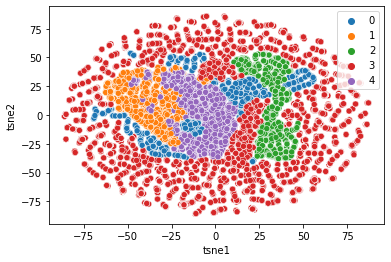

In [545]:
from sklearn.manifold import TSNE
#t-SNE is based on a stochastic (random) process, that is why I set the random_state so we could repeat the result
tsne = TSNE(random_state=0)
tsne_results = tsne.fit_transform(good_data_t) 
tsne_results=pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
sns.scatterplot(data = tsne_results, x = 'tsne1', y = 'tsne2', hue= preds,palette="tab10")

The clustering pattern reveals a lot of overlap between the clusters. Mapping the clusters into the different categories would enable to reveal the dominant category in each cluster, if any. 

### Distinctive representation of numerical features between clusters
We have 4 features used for clustering: 'Age_Car', 'powerPS', 'odometer_km'and 'unrepaired_damage'.
We are also mapping the clusters on the 'price_dollars' (not used in the clustering model) to see the price separation resulting from features separation between clusters.

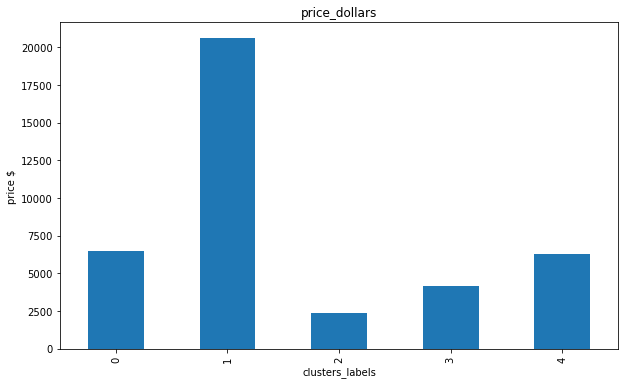

In [546]:
grouping_clusters = labelled_data.groupby('clusters_labels')['price_dollars'].mean()
grouping_clusters.plot(kind='bar', stacked = True, figsize=(10,6))
plt.ylabel('price $')
plt.title('price_dollars')
plt.show()

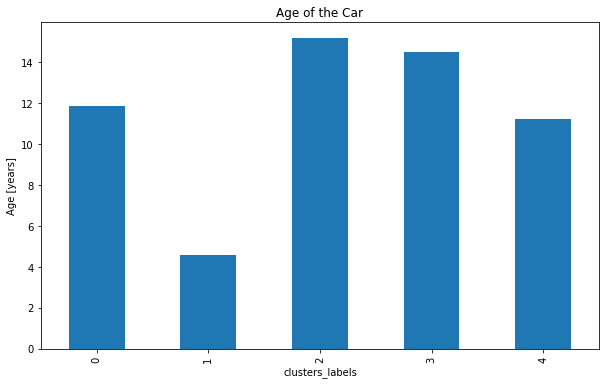

In [547]:
grouping_clusters = labelled_data.groupby('clusters_labels')['Age_Car'].mean()
grouping_clusters.plot(kind='bar', stacked = True, figsize=(10,6))
plt.ylabel('Age [years]')
plt.title('Age of the Car')
plt.show()

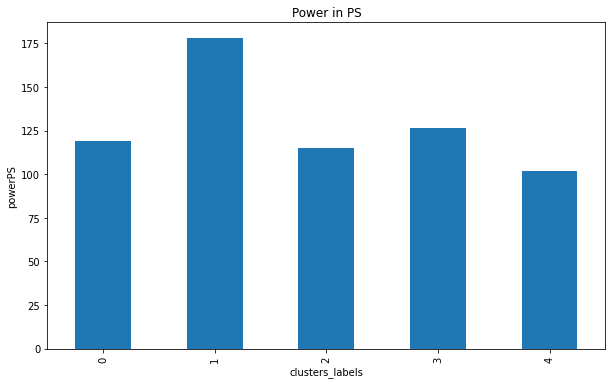

In [548]:
grouping_clusters = labelled_data.groupby('clusters_labels')['powerPS'].mean()
grouping_clusters.plot(kind='bar', stacked = True, figsize=(10,6))
plt.ylabel('powerPS')
plt.title('Power in PS')
plt.show()

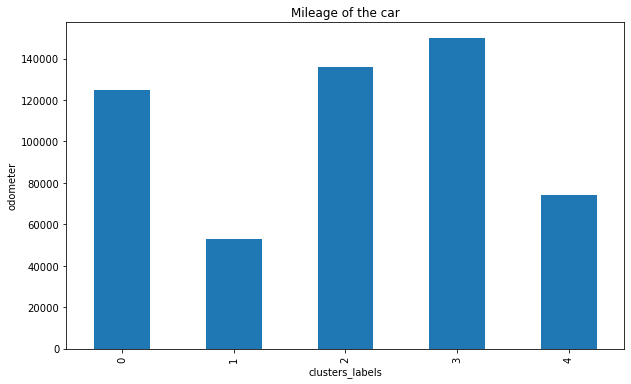

In [549]:
grouping_clusters = labelled_data.groupby('clusters_labels')['odometer_km'].mean()
grouping_clusters.plot(kind='bar', stacked = True, figsize=(10,6))
plt.ylabel('odometer')
plt.title('Mileage of the car')
plt.show()

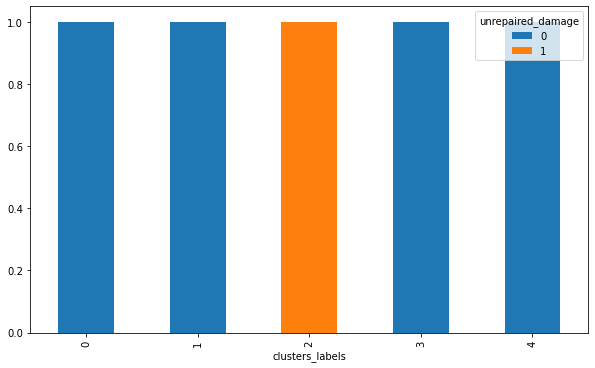

In [550]:
# Unrepaired damage is like categorical variable..
grouping_clusters = labelled_data.groupby('clusters_labels')['unrepaired_damage'].value_counts(normalize = True)
grouping_clusters.unstack().plot(kind='bar', stacked = True, figsize=(10,6))
plt.show()

## Observations & Insights

-  Interestingly, all the cars of unrepaired damage are lumped together in one cluster.. cluster 2 with the lowest       priced cars and greatest age and mileage. In other words, cluster 2 is the cluster of the very used up cars.

-  Cluster 1: low mileage, low age and high power made these cars cluster together in the 'expensive' cars cluster 

-  Cars in cluster 3 are cheaper on average than cars in cluster 0 and 4(which have similar price range)

- What differentiates cluster 0 from cluster 4 is that cluster 0 cars have higher mileage. It is expected to see more 'travel' cars in cluster 0 relative to cluster 4. There are more small cars (city travel) in 4 and more kombi(country travel/longer distances) in 0. 

- The relationship between cars in 3 and cars in 4 really matches the features importance ranking. Cars in 3 are cheaper as they have older age, higher mileage and little effect of their power on the price.

### Distinctive representation of categories between clusters
We have 3 categories: 'fuel_type', 'vehicle_type',and 'gearbox'. 'Model' and 'brand' are categories with so many entries, which make it hard to visualize. Such categories can be lumped into simpler categories to gain insight.
We are gonna analyze to further understand the separation between the cars belonging to the 5 clusters

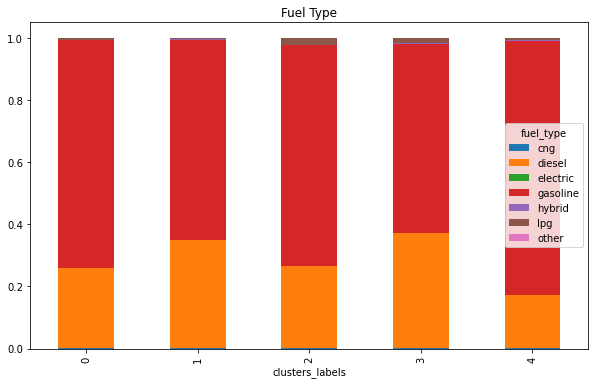

In [552]:
# To properly concatenate without changing the indices
clusters_s = pd.Series(preds)
clusters_s.index = autos_data.index

labelled_data = pd.concat([data_df, clusters_s], axis=1)
labelled_data.rename(columns={0: 'clusters_labels'}, inplace = True)

grouping_clusters = labelled_data.groupby('clusters_labels')['fuel_type'].value_counts(normalize = True)
grouping_clusters.unstack().plot(kind='bar', stacked = True, figsize=(10,6))
plt.title('Fuel Type')
plt.show()

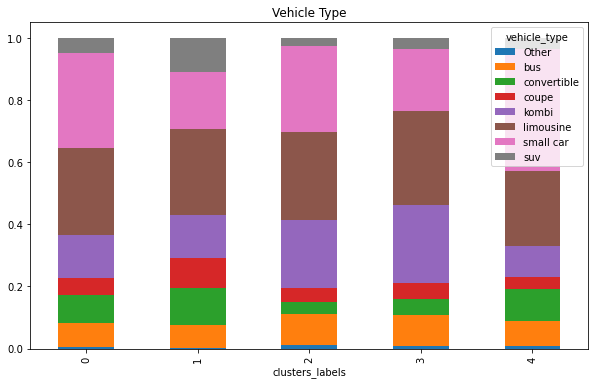

In [553]:
grouping_clusters = labelled_data.groupby('clusters_labels')['vehicle_type'].value_counts(normalize = True)
grouping_clusters.unstack().plot(kind='bar', stacked = True, figsize=(10,6))
plt.title('Vehicle Type')
plt.show()

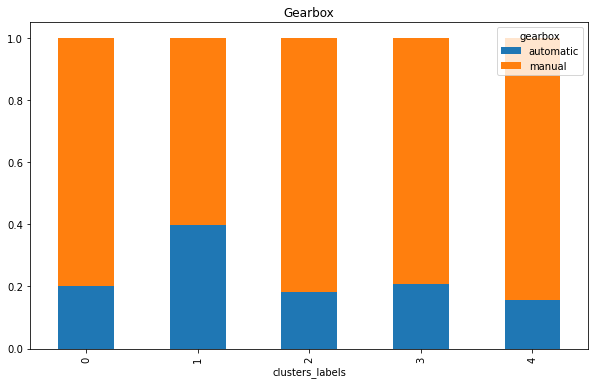

In [554]:
grouping_clusters = labelled_data.groupby('clusters_labels')['gearbox'].value_counts(normalize = True)
grouping_clusters.unstack().plot(kind='bar', stacked = True, figsize=(10,6))
plt.title('Gearbox')
plt.show()

The 'vehicle_type'seems to be heterogeneous between the clusters which requires extra investigation.

In [566]:
import plotly.io as pio

pio.renderers
pio.renderers.default = "svg"

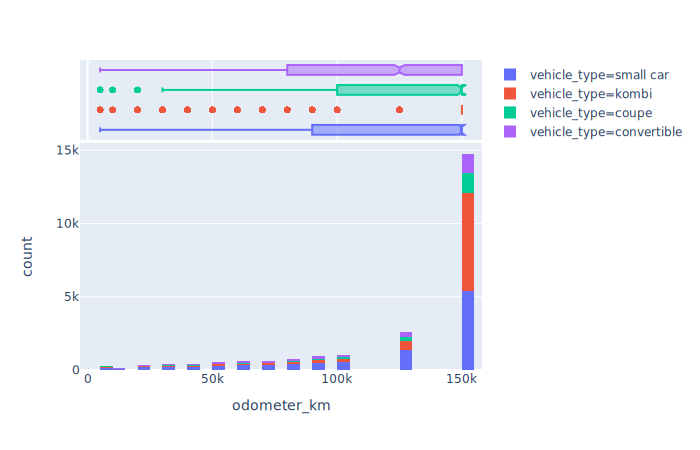

In [570]:
# To display the distribution of price, odometer, age of 
import plotly.express as px

def animate_marg(data,indices,category,features,variable):

    data_select = data[indices]
    fig = px.histogram(data_select, x = variable, color = category, marginal = 'box')
    fig.show("svg")



data = data_df
features= ['coupe','convertible','small car','kombi']
category = 'vehicle_type'
indices = data[category].isin(features)


variable = 'odometer_km'
animate_marg(data,indices,category,features,variable)

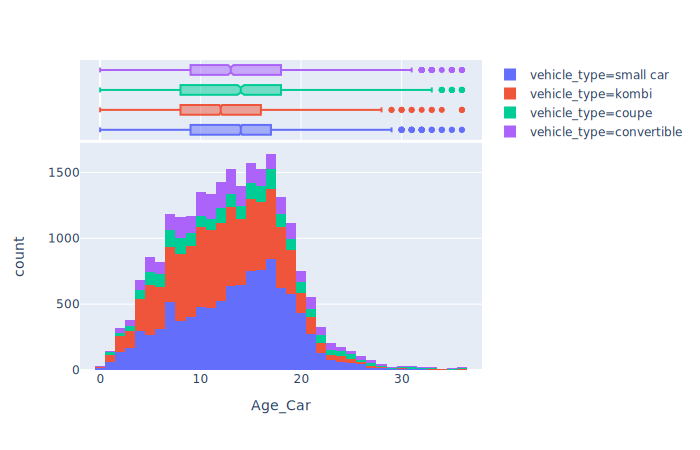

In [571]:
variable = 'Age_Car'

animate_marg(data,indices,category,features,variable)

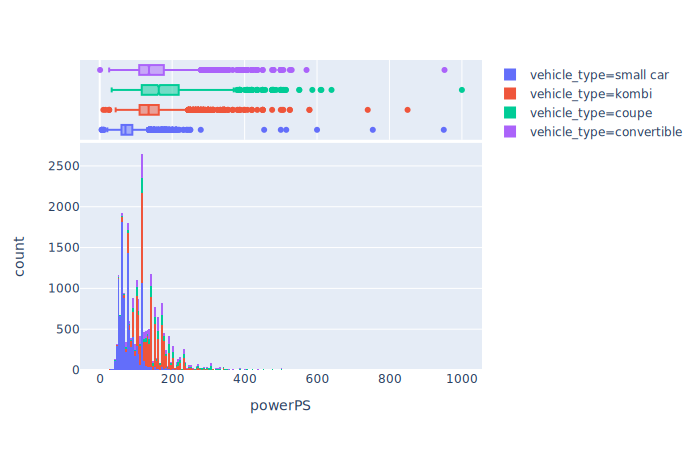

In [572]:
variable = 'powerPS'
animate_marg(data,indices,category,features,variable)

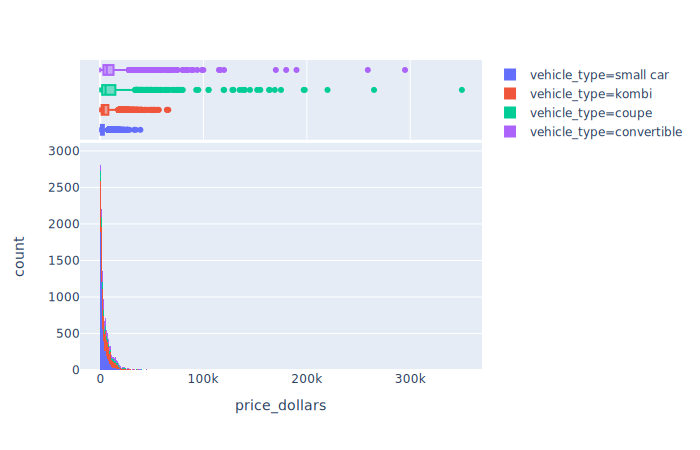

In [575]:
is_coupe_or_convertible_or_small = data_df['vehicle_type'].isin(features)
autos_prices_select = data_df[is_coupe_or_convertible_or_small]
fig = px.histogram(autos_prices_select, x = 'price_dollars', color = 'vehicle_type', marginal = 'box')
fig.show('svg')

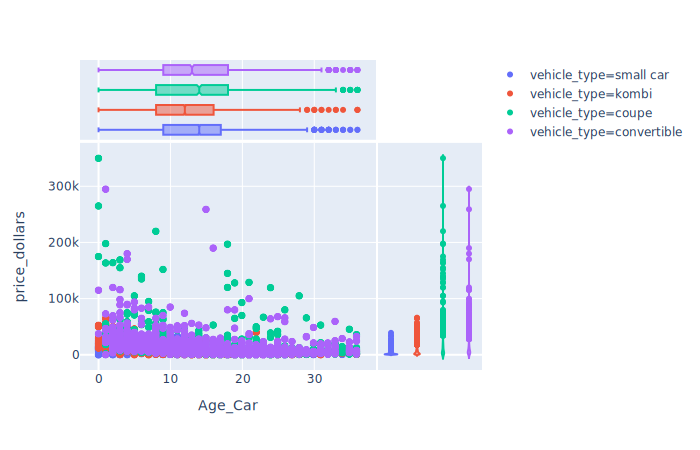

In [578]:
is_coupe_or_convertible_or_small = data_df['vehicle_type'].isin(features)
autos_data_select = data_df[is_coupe_or_convertible_or_small]
fig = px.scatter(autos_data_select, x = 'Age_Car',  y = 'price_dollars', color = 'vehicle_type',
                 marginal_x = 'box', marginal_y = 'violin')

fig.show('svg')

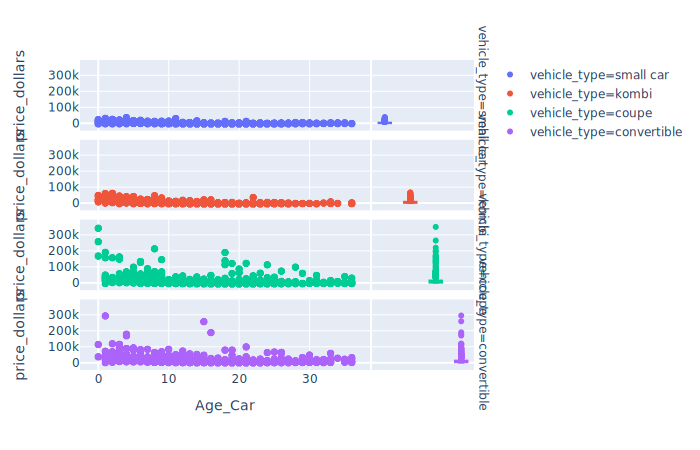

In [579]:
fig = px.scatter(autos_data_select, x="Age_Car", y="price_dollars", color = 'vehicle_type', facet_row="vehicle_type",
                  marginal_y="box")
fig.show('svg')

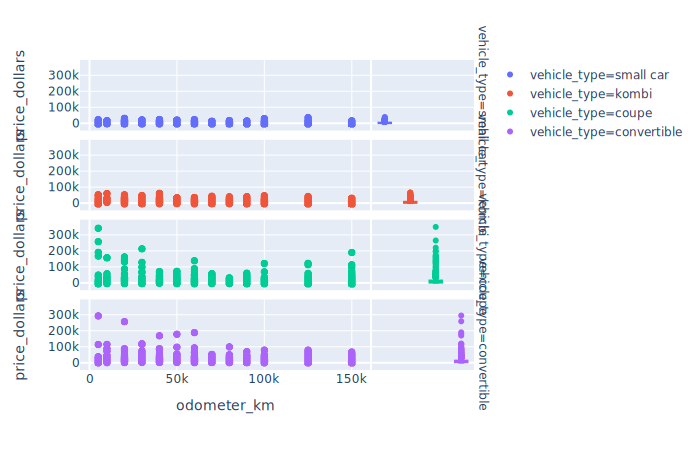

In [580]:
fig = px.scatter(autos_data_select, x="odometer_km", y="price_dollars", color = 'vehicle_type', facet_row="vehicle_type",
                  marginal_y="box")
fig.show()

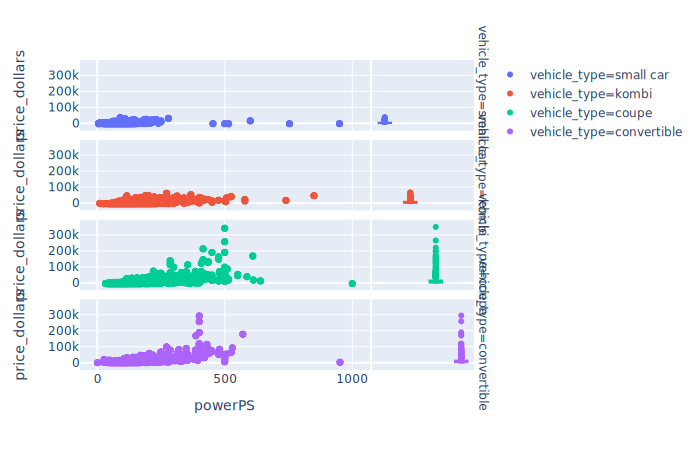

In [581]:
fig = px.scatter(autos_data_select, x="powerPS", y="price_dollars", color = 'vehicle_type', facet_row="vehicle_type",
                  marginal_y="box")
fig.show('svg')

#### Conclusion

- Just by checking 4 car types, it seems that convertible and coupe are 2 car types that hold value longer as their price range is higher despite the high mileage and the large age. For the car manufacturers of coupe and convertible, it's good to know that the clients expect the car to hold value for that long duration of ownership. 

- For future investigation, a very useful piece of data would be a conversion of 'postal code' data to 'rural'and 'urban' and comparing the pattern of the car usage and selling behavior between the 2 areas.